# Sommaire

* [1. Contexte](#partie1)
* [2. Nettoyage et filtrage des features et produits](#partie2)
    * [2.1 Présentation du DataSet](#partie2.1)
    * [2.2 Premier nettoyage du DataSet](#partie2.2)
    * [2.3 Choix de la variable cible](#partie2.3)
    * [2.4 Nettoyage en fonction de la variable cible](#partie2.4)
    * [2.5 Choix des variables prédictives](#partie2.5)
* [3. Identification et traitement des valeurs aberrantes](#partie3)
    * [3.1 Identification des valeurs aberrantes](#partie3.1)
    * [3.1 Traitement des valeurs aberrantes](#partie3.2)
* [4. Identification et traitement des valeurs manquantes](#partie4)
    * [4.1 Identification des valeurs manquantes](#partie4.1)
    * [4.2 Traitement des valeurs manquantes](#partie4.2)
* [5. Réalisation des analyses uni-variées et bi-variées](#partie5)
    * [5.1 Analyses uni-variées](#partie5.1)
    * [5.2 Analyses bi-variées](#partie5.2)
* [6. Réalisation d'une analyse multi-variée](#partie6)
* [7. Conclusion](#partie7)

## 1. Contexte <a class="anchor" id="partie1"></a>

L'agence Santé publique France souhaite améliorer sa base de données Open Food Facts et fait appel aux services de votre entreprise. Cette base de données open source est mise à la disposition de particuliers et d’organisations afin de leur permettre de connaître la qualité nutritionnelle de produits. 
 

Aujourd’hui, pour ajouter un produit à la base de données d'Open Food Facts, il est nécessaire de remplir de nombreux champs textuels et numériques, ce qui peut conduire à des erreurs de saisie et à des valeurs manquantes dans base.


 

L’agence Santé publique France confie à votre entreprise la création d’un système de suggestion ou d’auto-complétion pour aider les usagers à remplir plus efficacement la base de données. Dans un premier temps, vous devez vous concentrer sur la prise en main des données, et d’abord les nettoyer et les explorer. 

## 2. Nettoyage et filtrage des features et produits <a class="anchor" id="partie2"></a>

##### Importation des Librairies

In [14]:
# Importer les librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import missingno as msno
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew, norm, pearsonr
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

##### Chargement du datat set

In [16]:
# Charger le data set dans un data frame (df) à l'aide de la librairie pandas
df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

### 2.1. Présentation du dataset <a class="anchor" id="partie2.1"></a>

In [18]:
# Afficher un premier aperçu du data frame df
df.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [19]:
df.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  ...    ph_100g  \
count  2.611130e+05            857.000000  243891.000000  ...  49.000000   
mean   1.141915e+03            585.501214      12.730379  ...   6.425698   
std    6.447154e+03            712.809943      17.578747  ...   2.047841   
min    0.000000e+00              0.000000       0.000000  ...   0.000000   
25%    3.770000e+02             49.400000       0.000000  ...   6.300000   
50%    1.100000e+03            300.000000       5.000000  ...   7.200000   
75%    1.674000e+03            898.000000      20.000000  ...   7.400000   
max    3.251373e+06           3830.000000     714.290000  ...   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count            221210.000000            221210.000000                  0.0   
mean                  9.165535             

##### Affichage des dimensions du data set et du type des données.

In [21]:
# Afficher les dimensions du data frame, nombre de lignes et nombre de colonnes.
print("Ce jeu de données contient {} lignes et {} colonnes".format(df.shape[0], df.shape[1]))

# Afficher les types de données
df.dtypes.value_counts()

Ce jeu de données contient 320772 lignes et 162 colonnes


float64    106
object      56
Name: count, dtype: int64

### 2.2. Premier nettoyage du dataset <a class="anchor" id="partie2.2"></a>

##### Fonction pour nettoyer les lignes et colonnes vides du data frame

In [24]:
def remove_empty_rows_and_columns(df):

    # Dimensions initiales du DataFrame
    initial_shape = df.shape
    
    # Identifier et supprimer les colonnes entièrement vides
    empty_columns = df.columns[df.isnull().all()].tolist()
    df_without_empty = df.drop(columns=empty_columns)
    
    # Nombre de colonnes supprimées
    num_columns_removed = initial_shape[1] - df_without_empty.shape[1]
    
    # Dimensions après suppression des colonnes
    shape_after_column_removal = df_without_empty.shape
    
    # Supprimer les rangées entièrement vides
    df_without_empty = df_without_empty.dropna(how='all')
    
    # Nombre de rangées supprimées
    num_rows_removed = shape_after_column_removal[0] - df_without_empty.shape[0]
    
    return df_without_empty, num_columns_removed, num_rows_removed


In [25]:
# Appeler la fonction pour nettoyer le DataFrame
df_without_empty, num_columns_removed, num_rows_removed = remove_empty_rows_and_columns(df)

# Afficher les résultats
print(f"Nombre de colonnes supprimées : {num_columns_removed}")
print(f"Nombre de rangées supprimées : {num_rows_removed}")
print(f"Dimensions du DataFrame après nettoyage : {df_without_empty.shape}")

Nombre de colonnes supprimées : 16
Nombre de rangées supprimées : 0
Dimensions du DataFrame après nettoyage : (320772, 146)


In [26]:
num_duplicates = df_without_empty.duplicated(subset=['code'], keep=False).sum()
print(f"Nombre de doublons dans la colonne 'code' : {num_duplicates}")

# Supprimer les doublons basés sur la colonne 'code'
df_without_empty = df_without_empty.drop_duplicates(subset=['code'])

# Afficher le nombre de doublons supprimés
print(f"Nombre de doublons supprimés : {num_duplicates}")

# Afficher les dimensions finales du DataFrame après suppression des doublons
print(f"Dimensions du DataFrame après suppression des doublons : {df_without_empty.shape}")

Nombre de doublons dans la colonne 'code' : 23
Nombre de doublons supprimés : 23
Dimensions du DataFrame après suppression des doublons : (320750, 146)


In [27]:
# Lister des colonnes
print("Liste des colonnes :")
print(df_without_empty.columns.tolist())

Liste des colonnes :
['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_f

In [28]:
# Identifier les features qualitatives
qualitative_features = df_without_empty.select_dtypes(include=['object']).columns.tolist()

print("Features qualitatives :")
print(qualitative_features)

Features qualitatives :
['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']


In [29]:
# Identifier les features quantitatives
quantitative_features = df_without_empty.select_dtypes(include=['float64']).columns.tolist()

print("Features quantitatives :")
print(quantitative_features)

Features quantitatives :
['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'montanic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'gondoic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'casein_100g', 'serum-p

### 2.3. Choix de la variable cible <a class="anchor" id="partie2.3"></a>

Il est conseillé de choisir une variable cible catégorielle (qualitative), qui sera plus facile à gérer qu'une variable quantitative.
Parmi les variables présentes 4 retiennent mon attention :

- pnns_groups_1, pnns_groups_2 : Ces variables regroupent les produits en catégories nutritionnelles spécifiques, ce qui est très utile pour l'analyse comparative et la prédiction d'autres attributs.
- main_category et categories: Ces variables fournissent une catégorisation principale des produits, utile pour des analyses de haut niveau et pour structurer les données.

De plus, les variables pnns_groups_2 et categories sont plus détaillées que pnns_groups_1 et main_category.

Pour ce projet, je vais utiliser pnns_groups_2 comme variable cible, car elle regroupe les produits en catégories nutritionnelles spécifiques, ce qui est très utile pour l'analyse comparative et la prédiction d'autres attributs nutritionnels.

In [32]:
# Afficher les valeurs uniques de la colonne 'pnns_groups_2'
unique_pnns_groups_2 = df_without_empty['pnns_groups_2'].unique()
print("Valeurs uniques de 'pnns_groups_2' :")
print(unique_pnns_groups_2)

Valeurs uniques de 'pnns_groups_2' :
[nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Bread' 'Legumes'
 'Pizza pies and quiche' 'Meat' 'Sweets' 'Non-sugared beverages'
 'Sweetened beverages' 'Dressings and sauces' 'One-dish meals'
 'vegetables' 'Soups' 'Chocolate products' 'Alcoholic beverages' 'Fruits'
 'Sandwich' 'Cereals' 'Milk and yogurt' 'Fats' 'Cheese' 'Appetizers'
 'Nuts' 'Breakfast cereals' 'Artificially sweetened beverages'
 'Fruit juices' 'Eggs' 'Fish and seafood' 'Dried fruits' 'Ice cream'
 'Processed meat' 'Potatoes' 'Dairy desserts' 'Fruit nectars' 'pastries'
 'Tripe dishes' 'fruits' 'Salty and fatty products' 'cereals' 'legumes'
 'nuts']


In [33]:
# Suppression des lignes avec la valeur 'unknown' dans pnns_groups_2
df_without_empty = df_without_empty[df_without_empty['pnns_groups_2'] != 'unknown']

In [34]:
# Convertir toutes les valeurs en minuscules
df_without_empty['pnns_groups_2'] = df_without_empty['pnns_groups_2'].str.lower()

# Dictionnaire de remplacement pour uniformiser les valeurs
replacement_dict = {
    'vegetables': 'vegetables',
    'vegetable': 'vegetables',
    'legumes': 'vegetables',
    'cereals': 'cereals',
    'fruits': 'fruits',
    'fruit': 'fruits',
    'sweets': 'sweets',
    'biscuits and cakes': 'biscuits and cakes',
    'bread': 'bread',
    'pizza pies and quiche': 'pizza pies and quiche',
    'meat': 'meat',
    'non-sugared beverages': 'non-sugared beverages',
    'sweetened beverages': 'sweetened beverages',
    'dressings and sauces': 'dressings and sauces',
    'one-dish meals': 'one-dish meals',
    'soups': 'soups',
    'chocolate products': 'chocolate products',
    'alcoholic beverages': 'alcoholic beverages',
    'sandwich': 'sandwich',
    'milk and yogurt': 'milk and yogurt',
    'fats': 'fats',
    'cheese': 'cheese',
    'appetizers': 'appetizers',
    'nuts': 'nuts',
    'breakfast cereals': 'breakfast cereals',
    'artificially sweetened beverages': 'artificially sweetened beverages',
    'fruit juices': 'fruit juices',
    'eggs': 'eggs',
    'fish and seafood': 'fish and seafood',
    'dried fruits': 'dried fruits',
    'ice cream': 'ice cream',
    'processed meat': 'processed meat',
    'potatoes': 'potatoes',
    'dairy desserts': 'dairy desserts',
    'fruit nectars': 'fruit nectars',
    'pastries': 'pastries',
    'tripe dishes': 'tripe dishes',
    'salty and fatty products': 'salty and fatty products'
}

# Remplacer les valeurs selon le dictionnaire
df_without_empty['pnns_groups_2'] = df_without_empty['pnns_groups_2'].replace(replacement_dict)

# Afficher les valeurs uniques de la colonne 'pnns_groups_2' après uniformisation
unique_pnns_groups_2 = df_without_empty['pnns_groups_2'].unique()
print("Valeurs uniques de 'pnns_groups_2' après uniformisation :")
print(unique_pnns_groups_2)

Valeurs uniques de 'pnns_groups_2' après uniformisation :
[nan 'vegetables' 'biscuits and cakes' 'bread' 'pizza pies and quiche'
 'meat' 'sweets' 'non-sugared beverages' 'sweetened beverages'
 'dressings and sauces' 'one-dish meals' 'soups' 'chocolate products'
 'alcoholic beverages' 'fruits' 'sandwich' 'cereals' 'milk and yogurt'
 'fats' 'cheese' 'appetizers' 'nuts' 'breakfast cereals'
 'artificially sweetened beverages' 'fruit juices' 'eggs'
 'fish and seafood' 'dried fruits' 'ice cream' 'processed meat' 'potatoes'
 'dairy desserts' 'fruit nectars' 'pastries' 'tripe dishes'
 'salty and fatty products']


### 2.4. Nettoyage en fonction de la variable cible <a class="anchor" id="partie2.4"></a>

##### Fonction pour enlever les lignes qui ne contiennent pas la variable cible

In [37]:
def remove_rows_without_target(df, target_column):

    # Nombre initial de lignes dans le DataFrame
    initial_rows = df_without_empty.shape[0]

    # Supprimer les lignes n'ayant pas de valeur cible
    df_without_target = df.dropna(subset=[target_column])

    # Nombre de lignes après suppression
    final_rows = df_without_target.shape[0]

    # Calculer le nombre de lignes supprimées
    num_rows_removed = initial_rows - final_rows

    print(f"Nombre de lignes supprimées en raison de valeurs manquantes dans '{target_column}' : {num_rows_removed}")

    return df_without_target, num_rows_removed

In [38]:
# Appeler la fonction pour nettoyer le DataFrame
df_without_target, num_rows_removed = remove_rows_without_target(df_without_empty, 'pnns_groups_2')

# Afficher les dimensions du DataFrame après nettoyage
print(f"Dimensions du DataFrame après nettoyage : {df_without_target.shape}")

Nombre de lignes supprimées en raison de valeurs manquantes dans 'pnns_groups_2' : 226259
Dimensions du DataFrame après nettoyage : (71867, 146)


In [39]:
# Séparer la cible du reste du dataset
X = df_without_target.drop(columns=['pnns_groups_2']) # Contient toutes les colonnes sauf la cible
y = df_without_target['pnns_groups_2'] # Contient uniquement la colonne cible

In [40]:
print(f"Dimensions de X (features) : {X.shape}")
print(f"Dimensions de y (cible) : {y.shape}")

Dimensions de X (features) : (71867, 145)
Dimensions de y (cible) : (71867,)


##### Calcul du taux de remplissage

In [42]:
# Pour afficher toutes les lignes et toutes les colonnes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calculer les taux de remplissage des features du dataset
missing_values = X.isnull().mean() * 100

# Trier les valeurs manquantes par ordre croissant
missing_values = missing_values.sort_values(ascending=True)

# Formater les pourcentages avec 2 chiffres après la virgule et ajouter le signe %
missing_values = missing_values.apply(lambda x: f"{x:.2f}%")

print("Taux de valeurs manquantes des features (ordre croissant) :")
print(missing_values)

Taux de valeurs manquantes des features (ordre croissant) :
code                                            0.00%
states_fr                                       0.00%
states_tags                                     0.00%
states                                          0.00%
categories_fr                                   0.00%
categories_tags                                 0.00%
categories                                      0.00%
main_category                                   0.00%
main_category_fr                                0.00%
url                                             0.00%
creator                                         0.00%
last_modified_datetime                          0.00%
last_modified_t                                 0.00%
created_t                                       0.00%
created_datetime                                0.00%
countries                                       0.09%
countries_tags                                  0.09%
countries_fr          

Représentation du taux de valeurs manquantes


<Axes: >

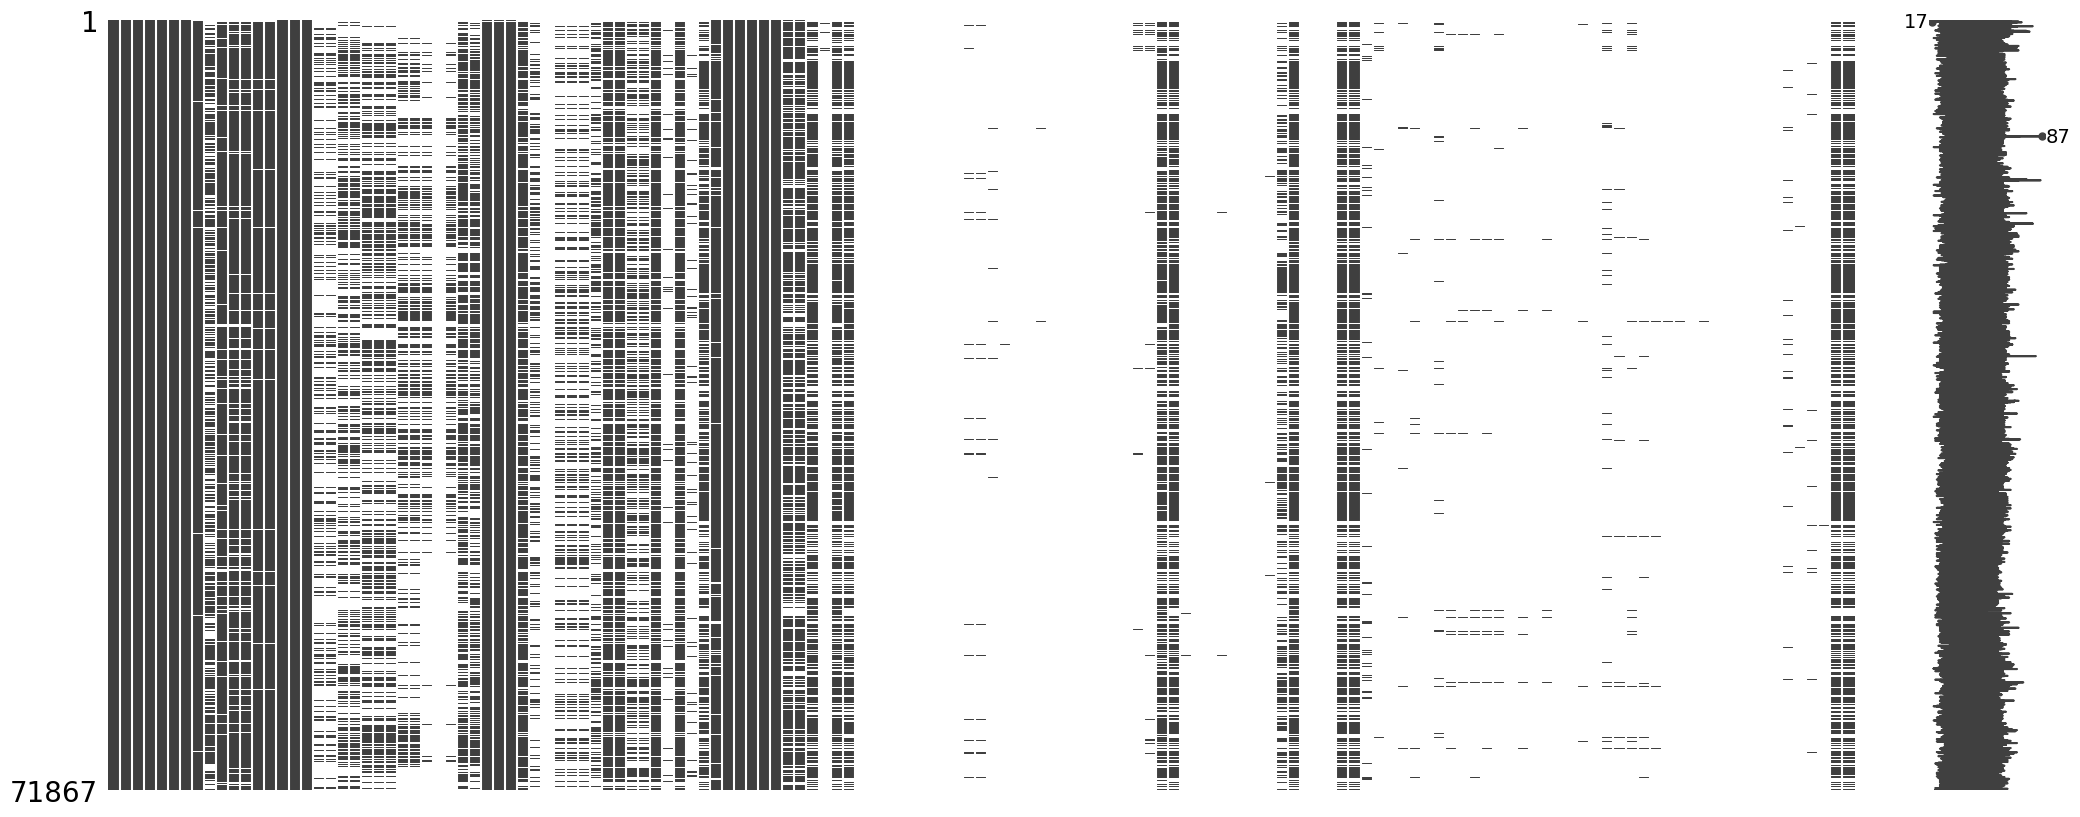

In [43]:
# Représentation visuelle des valeurs manquantes à l'aide de la librairie missingno
print("Représentation du taux de valeurs manquantes")
msno.matrix(X)

Features sélectionnées avec plus de 50% de taux de remplissage :
['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'labels', 'labels_tags', 'labels_fr', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'additives_n', 'additives', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']


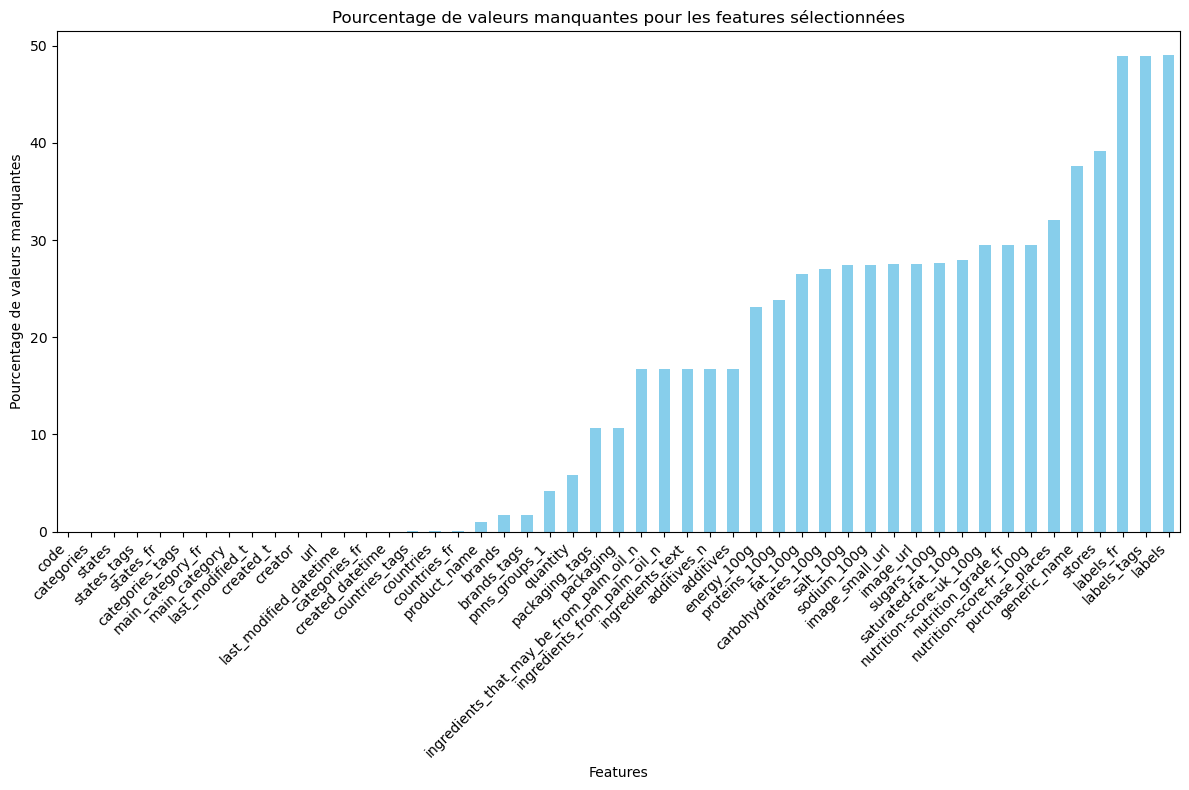

In [44]:
# Calculer le pourcentage de valeurs manquantes pour chaque feature
missing_values = X.isnull().mean() * 100

# Sélectionner les features avec moins de 50% de valeurs manquantes
selected_features = missing_values[missing_values < 50]
X_selected = X[selected_features.index]

print("Features sélectionnées avec plus de 50% de taux de remplissage :")
print(X_selected.columns.tolist())

# Créer un graphique en barres pour visualiser les pourcentages de valeurs manquantes
plt.figure(figsize=(12, 8))
selected_features.sort_values().plot(kind='bar', color='skyblue')
plt.title('Pourcentage de valeurs manquantes pour les features sélectionnées')
plt.xlabel('Features')
plt.ylabel('Pourcentage de valeurs manquantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.5. Choix des variables prédictives <a class="anchor" id="partie2.5"></a>

Parmi toutes ces variables j'ai choisis les suivantes :

- Informations Nutritionnelles : Essentielles pour caractériser les groupes alimentaires:
energy_100g,
fat_100g,
carbohydrates_100g,
proteins_100g,
sugars_100g,
salt_100g,
sodium_100g,
saturated-fat_100g,
fiber_100g.

- Catégorisation : Utile pour prédire des groupes alimentaires: categories et pnns_groups_1

Donc un total de 11 variables prédictives.

A présent nous pouvons retirer du dataframe, les variables qui ne vont pas servir à nos analyses.

In [47]:
# Sélectionner les features prédictives dans X
selected_features = [
    'energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g',
    'sugars_100g', 'salt_100g', 'saturated-fat_100g', 'fiber_100g',
    'sodium_100g','pnns_groups_1', 'categories'
]
X_cleaned = X[selected_features]

# Afficher les dimensions après la sélection
print(f"Dimensions du DataFrame après sélection des variables prédictives : {X_cleaned.shape}")

# Afficher un aperçu des données sélectionnées
print(X_cleaned.head())

Dimensions du DataFrame après sélection des variables prédictives : (71867, 11)
     energy_100g  fat_100g  carbohydrates_100g  proteins_100g  sugars_100g  \
174       1210.0      12.0                23.0          22.00          0.0   
175       1520.0      14.4                54.1           4.79         28.1   
177          NaN       NaN                 NaN            NaN          NaN   
180       1090.0      10.7                38.7           3.33         24.7   
182          NaN       NaN                 NaN            NaN          NaN   

     salt_100g  saturated-fat_100g  fiber_100g  sodium_100g  \
174      2.160                 7.0        2.00        0.850   
175      0.922                 NaN        2.05        0.363   
177        NaN                 NaN         NaN          NaN   
180      0.647                 2.0        2.00        0.255   
182        NaN                 NaN         NaN          NaN   

             pnns_groups_1                                         categ

In [48]:
# Calculer le pourcentage de valeurs manquantes
missing_percentage_categories = X_cleaned['categories'].isnull().mean() * 100
missing_percentage_pnns_groups_1 = X_cleaned['pnns_groups_1'].isnull().mean() * 100

print(f"Pourcentage de valeurs manquantes dans 'categories' : {missing_percentage_categories:.2f}%")
print(f"Pourcentage de valeurs manquantes dans 'pnns_groups_1' : {missing_percentage_pnns_groups_1:.2f}%")

Pourcentage de valeurs manquantes dans 'categories' : 0.00%
Pourcentage de valeurs manquantes dans 'pnns_groups_1' : 4.14%


In [49]:
# Nombre initial de lignes dans le DataFrame
initial_rows = X_cleaned.shape[0]

# Supprimer les lignes ayant des valeurs manquantes dans 'categories' et 'pnns_groups_1'
X_cleaned = X_cleaned.dropna(subset=['categories', 'pnns_groups_1'])

# Mettre à jour y en gardant uniquement les indices correspondants à X_cleaned
y = y.loc[X_cleaned.index]

# Nombre de lignes après suppression
final_rows = X_cleaned.shape[0]

# Calculer le nombre de lignes supprimées
num_rows_removed = initial_rows - final_rows

print(f"Nombre de lignes supprimées en raison de valeurs manquantes dans 'categories' ou 'pnns_groups_1' : {num_rows_removed}")

# Vérifier les dimensions après suppression
print(f"Dimensions du DataFrame après suppression des lignes : {X_cleaned.shape}")

# Afficher un aperçu des données après suppression
print(X_cleaned.head())

Nombre de lignes supprimées en raison de valeurs manquantes dans 'categories' ou 'pnns_groups_1' : 2978
Dimensions du DataFrame après suppression des lignes : (68889, 11)
     energy_100g  fat_100g  carbohydrates_100g  proteins_100g  sugars_100g  \
174       1210.0      12.0                23.0          22.00          0.0   
175       1520.0      14.4                54.1           4.79         28.1   
177          NaN       NaN                 NaN            NaN          NaN   
180       1090.0      10.7                38.7           3.33         24.7   
182          NaN       NaN                 NaN            NaN          NaN   

     salt_100g  saturated-fat_100g  fiber_100g  sodium_100g  \
174      2.160                 7.0        2.00        0.850   
175      0.922                 NaN        2.05        0.363   
177        NaN                 NaN         NaN          NaN   
180      0.647                 2.0        2.00        0.255   
182        NaN                 NaN         Na

##### Valeurs incohérentes
On entend par la des valeurs qui ne sont tout simplement pas possible comme un taux de graisse saturée supérieur au taux de graisse, un taux de sucre supérieur au taux de glucides, un taux de sodium supérieur au taux de sel. un composant ne peut pas être supérieur au produit général.

Pour analyser ces valeurs, J'ai cherché des produits contenant ces valeurs incohérentes et je suis allé sur la base de données OpenFoodFacts pour vérifier les données qui ont été entrées.
Il est impossible de savoir comment ces erreurs ont été faites avec précision, par inversion avec un autre valeur, par faute de frappe etc.

Exemple:
- le produit "Tirlibibi" est un sachet de bonbon contenant:
    - dans la base OpenFoodFacts 0,8g de graisse saturé pour 0,6g de graisse.
    - Or, sur l'étiquette il est mentionné que la graisse est présente à hauteur de 0,6g. La valeur de la graisse saturée n'est pas bonne et nous n'avons aucune information dessus.
    - Par contre, sur le nouveau packaging, il y a 1,6g de graisse pour 0,8g de graisse saturée.
    - Ce produit est un mix des 2 produits.

Plutot que de faire des suppositions et fausser le jeu de données, je préfère supprimer les lignes qui contiennent ce genre de valeurs incohérentes.

In [51]:
# Supprimer les lignes incohérentes
X_cleaned = X_cleaned[X_cleaned['saturated-fat_100g'] <= X_cleaned['fat_100g']]
X_cleaned = X_cleaned[X_cleaned['sugars_100g'] + X_cleaned['fiber_100g'] <= X_cleaned['carbohydrates_100g']]
X_cleaned = X_cleaned[X_cleaned['sodium_100g'] <= X_cleaned['salt_100g']]

# Vérifier les dimensions après suppression
print(f"Dimensions du DataFrame après suppression des lignes incohérentes : {X_cleaned.shape}")

# Réajuster y pour correspondre aux nouvelles dimensions de X_cleaned
y = y.loc[X_cleaned.index]

Dimensions du DataFrame après suppression des lignes incohérentes : (23140, 11)


Affichage graphique du remplissage des colonnes


<Axes: >

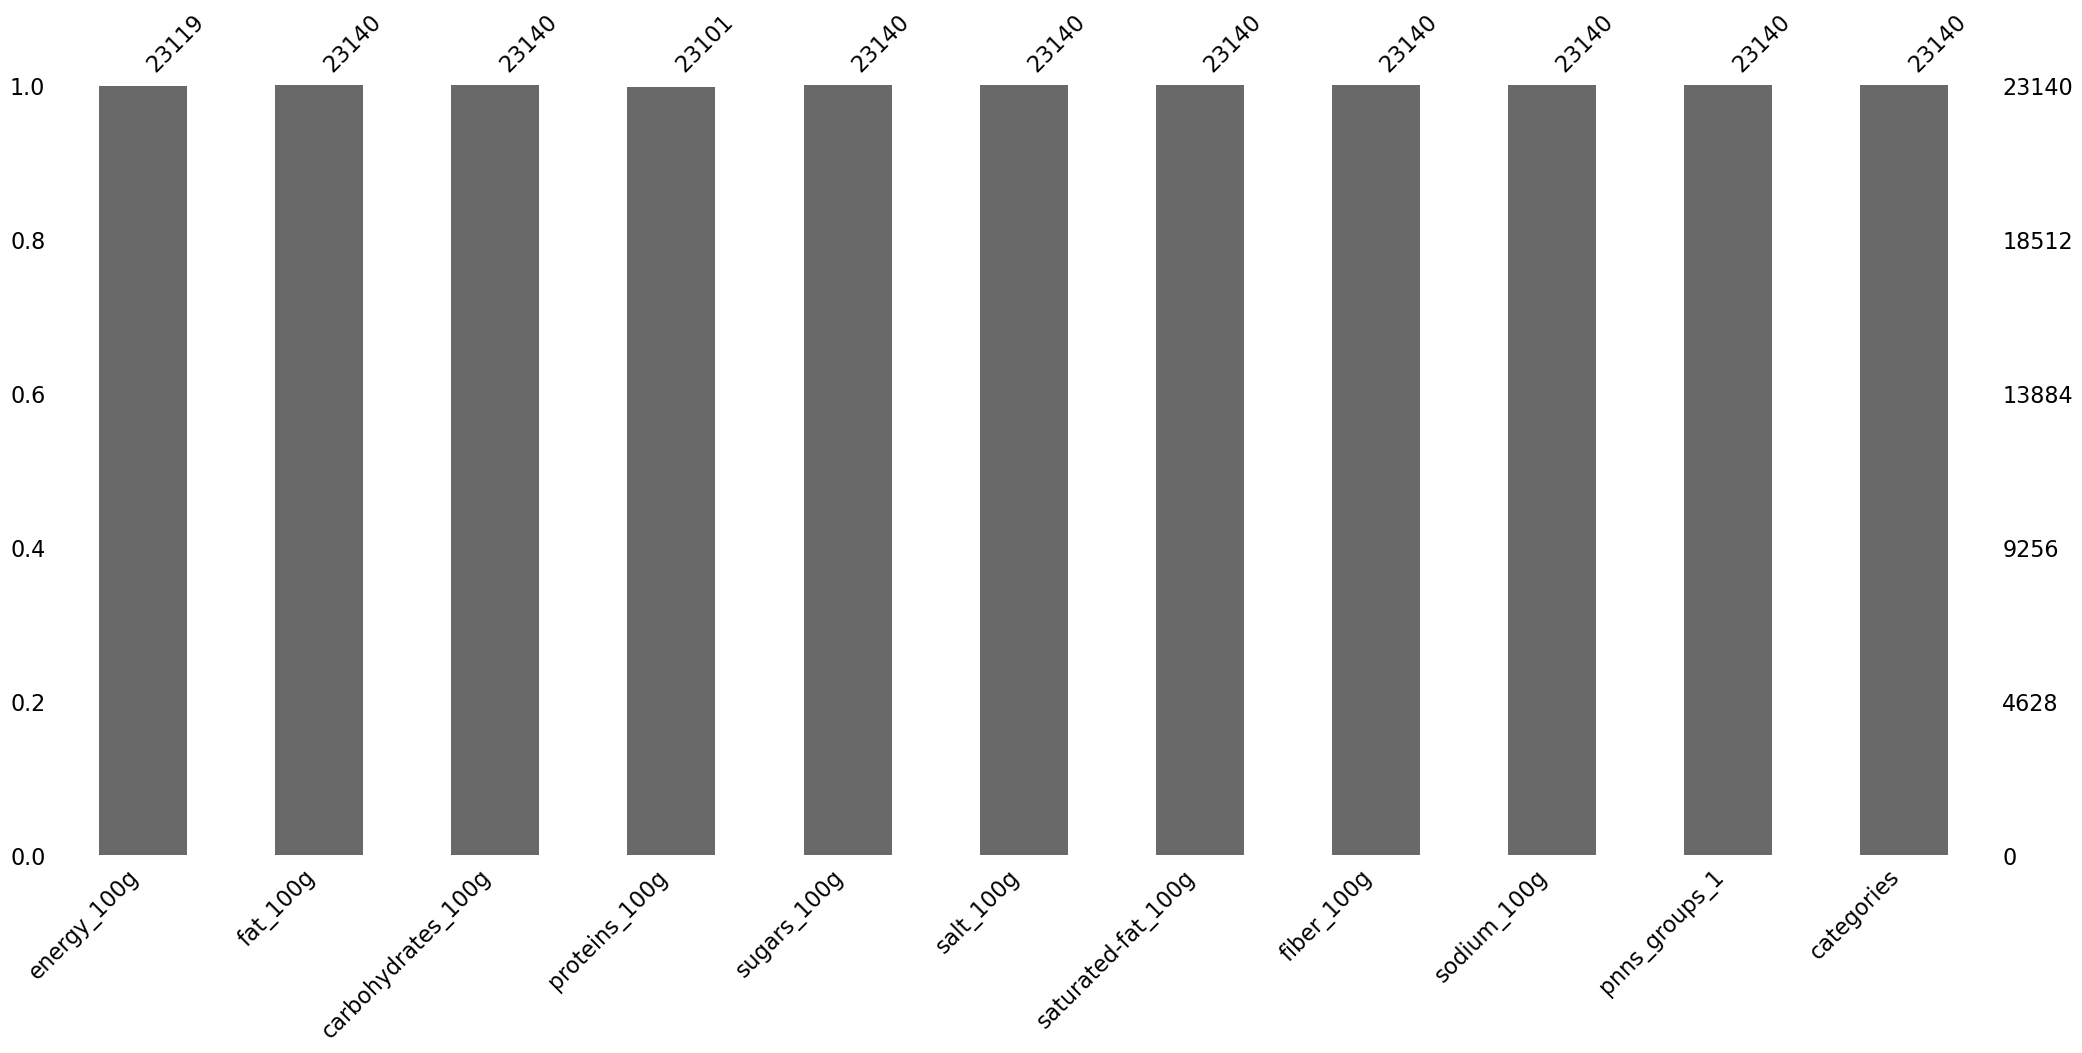

In [52]:
# Représentation visuelle du taux de remplissage du data frame nettoyé, avant analyse
print("Affichage graphique du remplissage des colonnes")
msno.bar(X_cleaned)

## 3. Identification et traitement des valeurs aberrantes <a class="anchor" id="partie3"></a>: 

In [54]:
X_cleaned.describe()

energy_100g      fat_100g  carbohydrates_100g  proteins_100g  \
count  23119.000000  23140.000000        23140.000000   23101.000000   
mean    1159.315525     11.833603           34.578616       7.251217   
std      783.996965     16.027406           27.951819       6.274417   
min        0.000000      0.000000            0.000000       0.000000   
25%      455.000000      1.500000            9.000000       2.800000   
50%     1138.000000      5.800000           25.650000       6.300000   
75%     1700.000000     17.525000           62.000000      10.000000   
max    22000.000000    380.000000          190.000000      86.000000   

        sugars_100g     salt_100g  saturated-fat_100g    fiber_100g  \
count  23140.000000  23140.000000        23140.000000  23140.000000   
mean      11.789918      0.842841            4.373600      2.585733   
std       16.357996      2.852826            7.232413      3.181302   
min        0.000000      0.000000            0.000000      0.000000   
25%        1.400000      0.080000            0.300000      0.200000   
50%        4.000000      0.570000            1.600000      1.700000   
75%       16.000000      1.100000            5.500000      3.600000   
max      134.000000    276.860000          210.000000     46.700000   

        sodium_100g  
count  23140.000000  
mean       0.331826  
std        1.122969  
min        0.000000  
25%        0.031496  
50%        0.224409  
75%        0.433071  
max      109.000000

### 3.1. Identification des valeurs aberrantes <a class="anchor" id="partie3.1"></a>

Pour une meilleure visualisation des valeurs aberrantes, on utilise ici des graphiques en boite à moustaches.
La feature energy_100g étant exprimée en Kj, elle sera visualisé à part.
Les autres features sont exprimées en grammes, on va donc les visualiser ensemble.

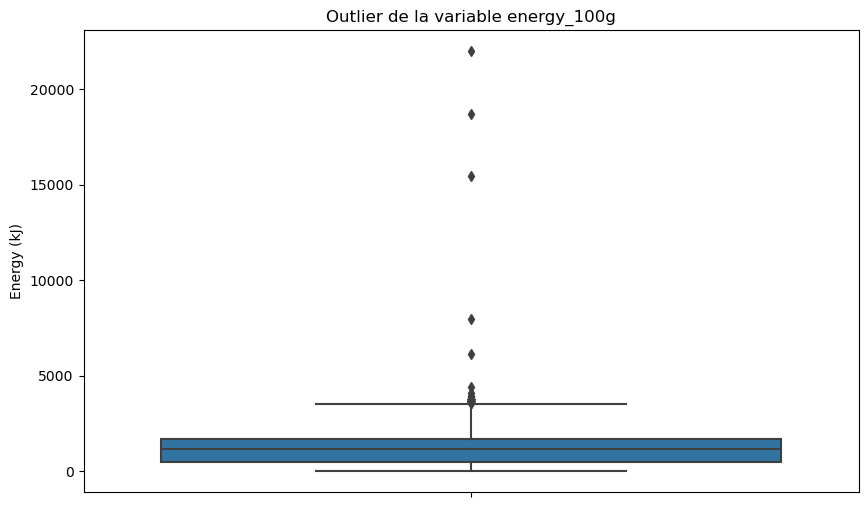

In [57]:
# Créer une figure pour le boxplot de 'energy_100g'
plt.figure(figsize=(10, 6))

# Désactiver la notation scientifique pour l'axe y
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(y=X_cleaned['energy_100g'])
plt.title('Outlier de la variable energy_100g')
plt.ylabel('Energy (kJ)')
plt.show()

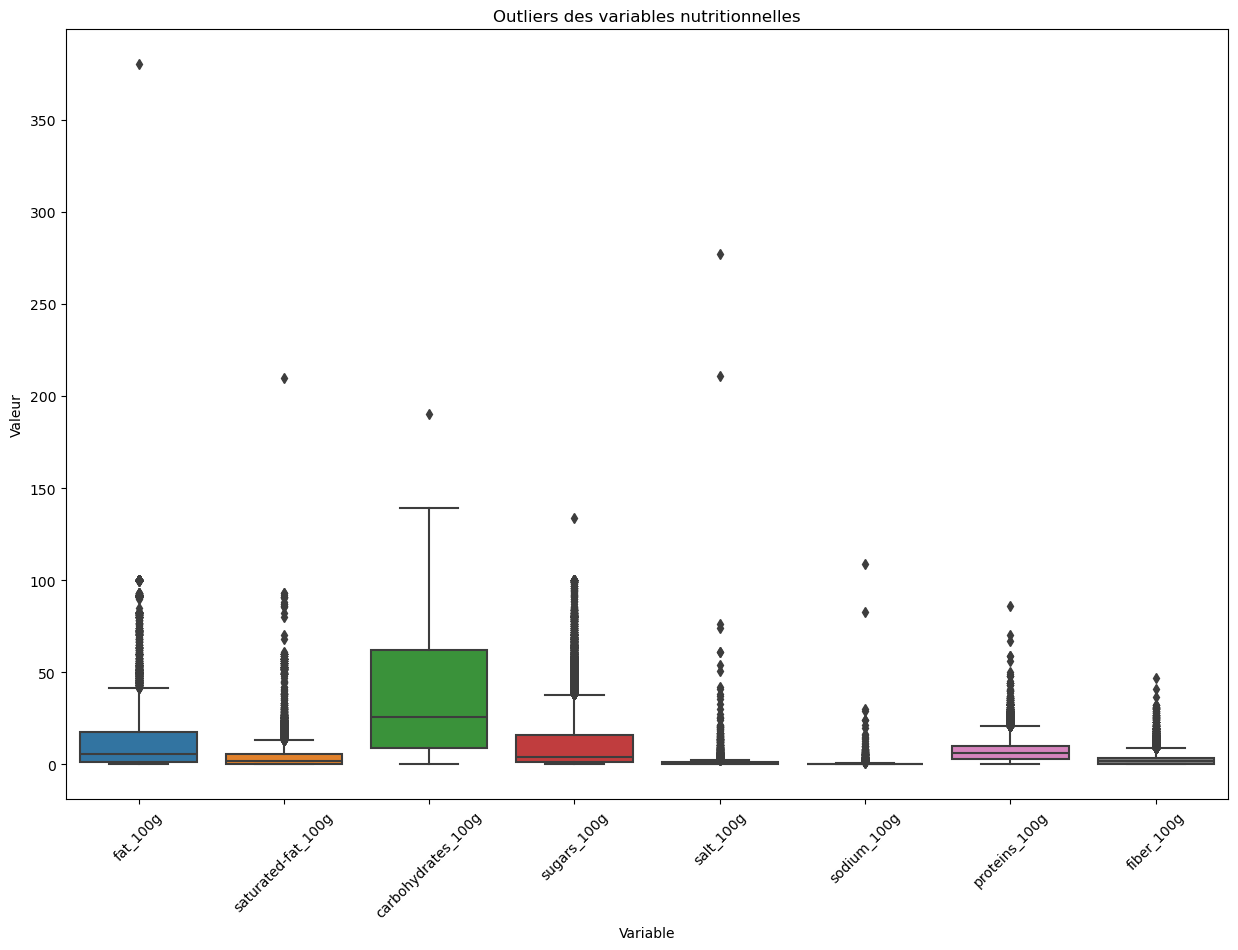

In [58]:
# Sélectionner les variables numériques à analyser
numeric_features = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                    'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g']

# Créer un DataFrame pour les variables sélectionnées
df_numeric = X_cleaned[numeric_features]

# Fondre le DataFrame pour que seaborn puisse créer un box plot combiné
df_melted = df_numeric.melt(var_name='Variable', value_name='Valeur')

# Créer un box plot combiné
plt.figure(figsize=(15, 10))
sns.boxplot(x='Variable', y='Valeur', data=df_melted)
plt.title('Outliers des variables nutritionnelles')
plt.xticks(rotation=45)
plt.show()

### 3.2. Traitement des valeurs aberrantes <a class="anchor" id="partie3.2"></a>

- Nous allons maintenant traiter les valeurs aberrantes en commençant par remplacer les valeurs négatives par 0.
- Pour détecter et traiter les valeurs aberrantes, nous allons utiliser la méthode des Qartiles.
- Les valeurs en dehors des bornes seront remplacées par la médiane ou par la valeur maximale fixée; c'est à dire 3700 Kj pour la feature energy_100g (qui est la valeur maximale connue) et 100g pour les autres features.

##### Création de fonctions pour traiter les valeurs négatives et aberrantes

In [62]:
# Fonction pour traiter les valeurs négatives
def replace_negative_values(df, column):
    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)

# Fonction pour détecter et remplacer les valeurs aberrantes
def detect_and_replace_outliers(df, column, upper_bound=None):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    if upper_bound is None:
        upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    
    # Remplacer les valeurs en dehors des bornes par la médiane ou par l'upper bound
    df.loc[df[column] < lower_bound, column] = median_value
    if upper_bound is not None:
        df.loc[df[column] > upper_bound, column] = upper_bound

# Liste des features numériques
numeric_features = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                    'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g']

# Remplacer les valeurs négatives et appliquer le traitement des valeurs aberrantes
for feature in numeric_features:
    replace_negative_values(X_cleaned, feature)
    detect_and_replace_outliers(X_cleaned, feature, upper_bound=100)  # Fixer upper_bound à 100 pour ces variables

# Traitement spécifique pour energy_100g
replace_negative_values(X_cleaned, 'energy_100g')
detect_and_replace_outliers(X_cleaned, 'energy_100g', upper_bound=3766)

# Vérifier les valeurs après le traitement
print(X_cleaned.describe())

        energy_100g      fat_100g  carbohydrates_100g  proteins_100g  \
count  23119.000000  23140.000000        23140.000000   23101.000000   
mean    1157.033938     11.821502           34.571226       7.251217   
std      756.144037     15.854198           27.926042       6.274417   
min        0.000000      0.000000            0.000000       0.000000   
25%      455.000000      1.500000            9.000000       2.800000   
50%     1138.000000      5.800000           25.650000       6.300000   
75%     1700.000000     17.525000           62.000000      10.000000   
max     3766.000000    100.000000          100.000000      86.000000   

        sugars_100g     salt_100g  saturated-fat_100g    fiber_100g  \
count  23140.000000  23140.000000        23140.000000  23140.000000   
mean      11.788449      0.830401            4.368846      2.585733   
std       16.348542      1.946035            7.132717      3.181302   
min        0.000000      0.000000            0.000000      0.000000

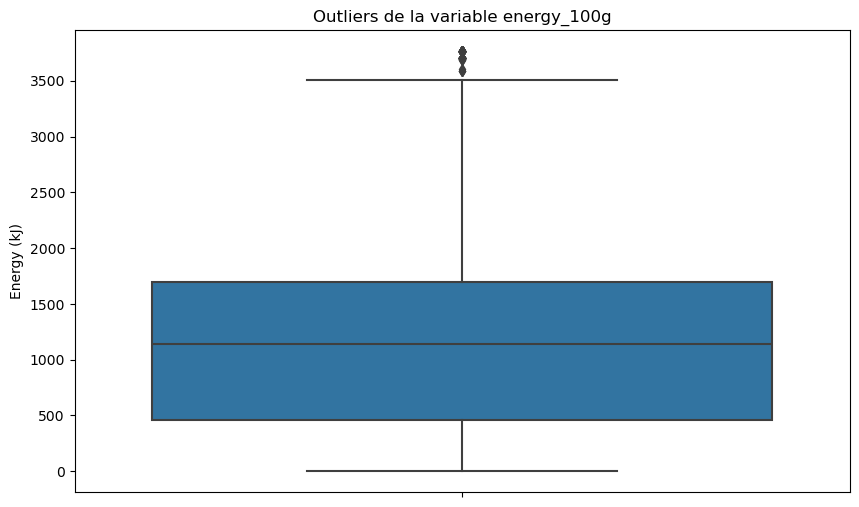

In [63]:
# Créer un graphique boxplot de 'energy_100g'
plt.figure(figsize=(10, 6))

sns.boxplot(y=X_cleaned['energy_100g'])
plt.title('Outliers de la variable energy_100g')
plt.ylabel('Energy (kJ)')
plt.show()

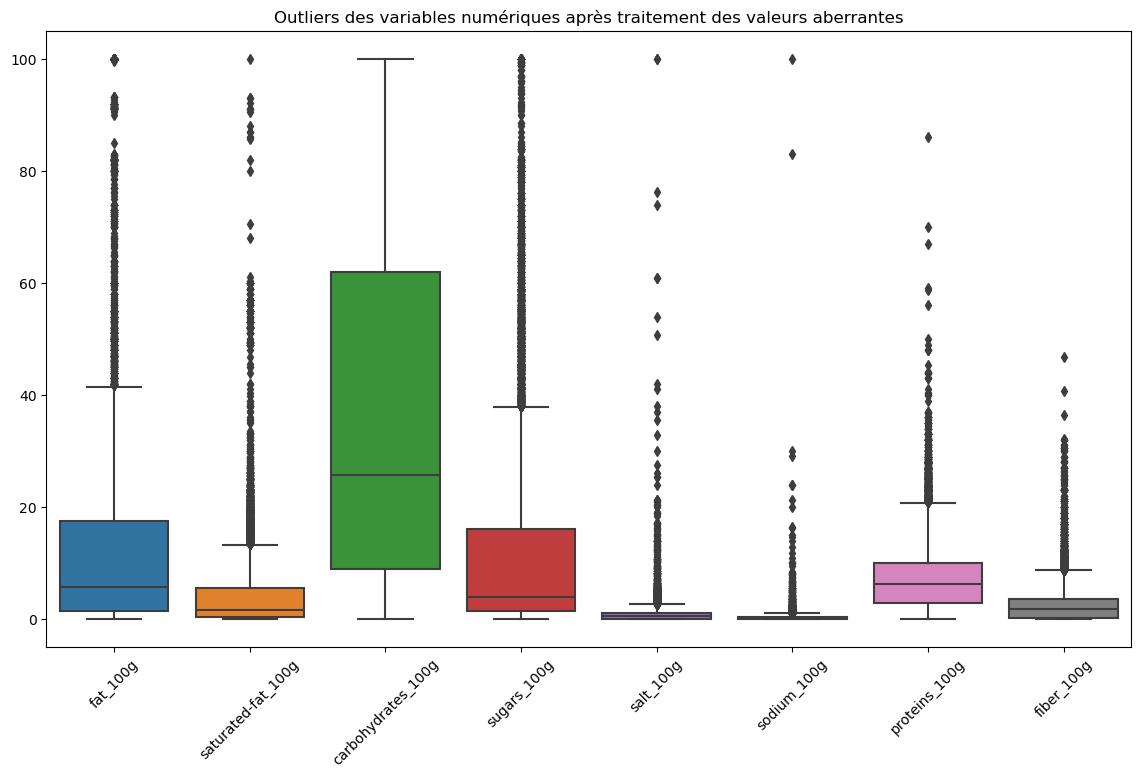

In [64]:


# Créer un graphique boxplot des autres variables
plt.figure(figsize=(14, 8))
sns.boxplot(data=X_cleaned[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                    'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g']])
plt.title('Outliers des variables numériques après traitement des valeurs aberrantes')
plt.xticks(rotation=45)
plt.show()

## 4. Identification et traitement des valeurs manquantes <a class="anchor" id="partie4"></a>

Pour traiter les valeurs manquantes, nous allons suivre une démarche systématique en commençant par identifier les valeurs manquantes, puis en appliquant des méthodes d'imputation adaptées.

### 4.1. Identification des valeurs manquantes <a class="anchor" id="partie4.1"></a>

In [68]:
# Identifier les valeurs manquantes
missing_values = X_cleaned.isnull().mean() * 100
print("Taux de valeurs manquantes par feature :")
print(missing_values[missing_values > 0])

Taux de valeurs manquantes par feature :
energy_100g      0.090752
proteins_100g    0.168539
dtype: float64


In [69]:
# Afficher les valeurs uniques de la colonne 'pnns_groups_1'
unique_pnns_groups_1 = X_cleaned['pnns_groups_1'].unique()
print("Valeurs uniques de 'pnns_groups_1' :")
print(unique_pnns_groups_1)

Valeurs uniques de 'pnns_groups_1' :
['Fruits and vegetables' 'Sugary snacks' 'Composite foods' 'Beverages'
 'Fish Meat Eggs' 'Cereals and potatoes' 'Milk and dairy products'
 'Fat and sauces' 'Salty snacks' 'fruits-and-vegetables' 'sugary-snacks'
 'cereals-and-potatoes' 'salty-snacks']


On peut remarquer certains doublons par exemple, Sugary snacks et sugary-snacks.
On va donc uniformiser la nomenclature en écrivant tout en minuscule et avec des tirets comme séparation.

In [71]:
# Uniformiser les valeurs de 'pnns_groups_1'
X_cleaned['pnns_groups_1'] = X_cleaned['pnns_groups_1'].str.lower().str.replace(' ', '-')

# Vérifier les valeurs uniques après uniformisation
print("Valeurs uniques de 'pnns_groups_1' après uniformisation :")
print(X_cleaned['pnns_groups_1'].unique())

Valeurs uniques de 'pnns_groups_1' après uniformisation :
['fruits-and-vegetables' 'sugary-snacks' 'composite-foods' 'beverages'
 'fish-meat-eggs' 'cereals-and-potatoes' 'milk-and-dairy-products'
 'fat-and-sauces' 'salty-snacks']


### 4.2. Traitement des valeurs manquantes <a class="anchor" id="partie4.2"></a>

- Afin d'identifier les produits connus pour ne pas contenir les composants identifiés par nos variables (exemple: fiber_100g), nous allons prendre chaque valeur potentielle de la variable pnns_groups_1 et faire une recherche par composant.
- Exemple: dans la variable pnns_groups_1, la valeur salty-snacks est-elle connue pour avoir une variable fiber_100g égale à 0.
- Formulation plus simple : Les snacks salés sont-ils connus pour contenir des fibres ?
- l'énergie n'étant pas un composant à proprement parlé, nous traiterons le cas de la variable energy_100g différemment.

##### création d'une fonction qui va imputer les valeurs manquantes par 0 pour les catégories connues comme n'ayant pas certains nutriments

In [75]:
def impute_missing_values_by_category(df, variable, categories_without_nutrient):
   
    # Afficher les valeurs manquantes avant l'imputation
    missing_before = df[variable].isnull().sum()
    print(f"{variable} - Valeurs manquantes avant imputation : {missing_before}")
    
    # Imputer les valeurs manquantes par 0 pour les catégories spécifiques
    df.loc[(df['pnns_groups_1'].isin(categories_without_nutrient)) & (df[variable].isnull()), variable] = 0
    
    # Afficher les valeurs manquantes après l'imputation
    missing_after = df[variable].isnull().sum()
    print(f"{variable} - Valeurs manquantes après imputation : {missing_after}")

# Définir les catégories pour chaque variable
categories_without_nutrients = {
    'fat_100g': ['beverages', 'fruits-and-vegetables'],
    'carbohydrates_100g': ['fish-meat-eggs', 'fat-and-sauces'],
    'proteins_100g': ['beverages', 'fat-and-sauces', 'sugary-snacks'],
    'sugars_100g': ['fish-meat-eggs', 'beverages', 'fat-and-sauces', 'salty-snacks'],
    'salt_100g': ['fruits-and-vegetables', 'sugary-snacks', 'milk-and-dairy-products'],
    'saturated-fat_100g': ['fruits-and-vegetables', 'beverages'],
    'fiber_100g': ['fish-meat-eggs', 'beverages', 'fat-and-sauces', 'milk-and-dairy-products', 'sugary-snacks']
}

# Appliquer l'imputation pour chaque variable
for variable, categories in categories_without_nutrients.items():
    impute_missing_values_by_category(X_cleaned, variable, categories)

fat_100g - Valeurs manquantes avant imputation : 0
fat_100g - Valeurs manquantes après imputation : 0
carbohydrates_100g - Valeurs manquantes avant imputation : 0
carbohydrates_100g - Valeurs manquantes après imputation : 0
proteins_100g - Valeurs manquantes avant imputation : 39
proteins_100g - Valeurs manquantes après imputation : 13
sugars_100g - Valeurs manquantes avant imputation : 0
sugars_100g - Valeurs manquantes après imputation : 0
salt_100g - Valeurs manquantes avant imputation : 0
salt_100g - Valeurs manquantes après imputation : 0
saturated-fat_100g - Valeurs manquantes avant imputation : 0
saturated-fat_100g - Valeurs manquantes après imputation : 0
fiber_100g - Valeurs manquantes avant imputation : 0
fiber_100g - Valeurs manquantes après imputation : 0


Maintenant, nous allons traiter les valeurs manquantes restantes avec une imputation KNN. Après avoir testé l'imputation par la médiane jusqu'à l'évaluation du modèle, la méthode KNN s'avère plus efficace. 

In [77]:
# Identifier les valeurs manquantes
missing_values = X_cleaned.isnull().mean() * 100
print("Taux de valeurs manquantes par feature :")
print(missing_values[missing_values > 0])

Taux de valeurs manquantes par feature :
energy_100g      0.090752
proteins_100g    0.056180
dtype: float64


#### Création d'une fonction pour l'imputation KNN des valeurs manquantes.

In [79]:
def impute_missing_values_knn(df, features, n_neighbors=5):
    
    # Convertir les valeurs infinies en NaN pour l'ensemble des colonnes
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Créer une copie des données avant imputation
    df_before_imputation = df.copy()

    # Normalisation des données
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[features] = scaler.fit_transform(df[features])

    # Appliquer l'imputation KNN
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_scaled[features] = imputer.fit_transform(df_scaled[features])

    # Inverser la normalisation pour revenir aux valeurs d'origine
    df[features] = scaler.inverse_transform(df_scaled[features])

    # Vérifier les valeurs manquantes après l'imputation KNN
    missing_values_after_knn_imputation = df.isnull().mean() * 100
    print("Taux de valeurs manquantes après imputation KNN :")
    print(missing_values_after_knn_imputation[missing_values_after_knn_imputation > 0])

    return df, df_before_imputation

In [80]:
# Utilisation de la fonction pour l'imputation KNN
knn_features = [
    'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'energy_100g',
    'sugars_100g', 'salt_100g', 'saturated-fat_100g', 'fiber_100g', 'sodium_100g'
]

X_cleaned, X_before_imputation = impute_missing_values_knn(X_cleaned, knn_features)

Taux de valeurs manquantes après imputation KNN :
Series([], dtype: float64)


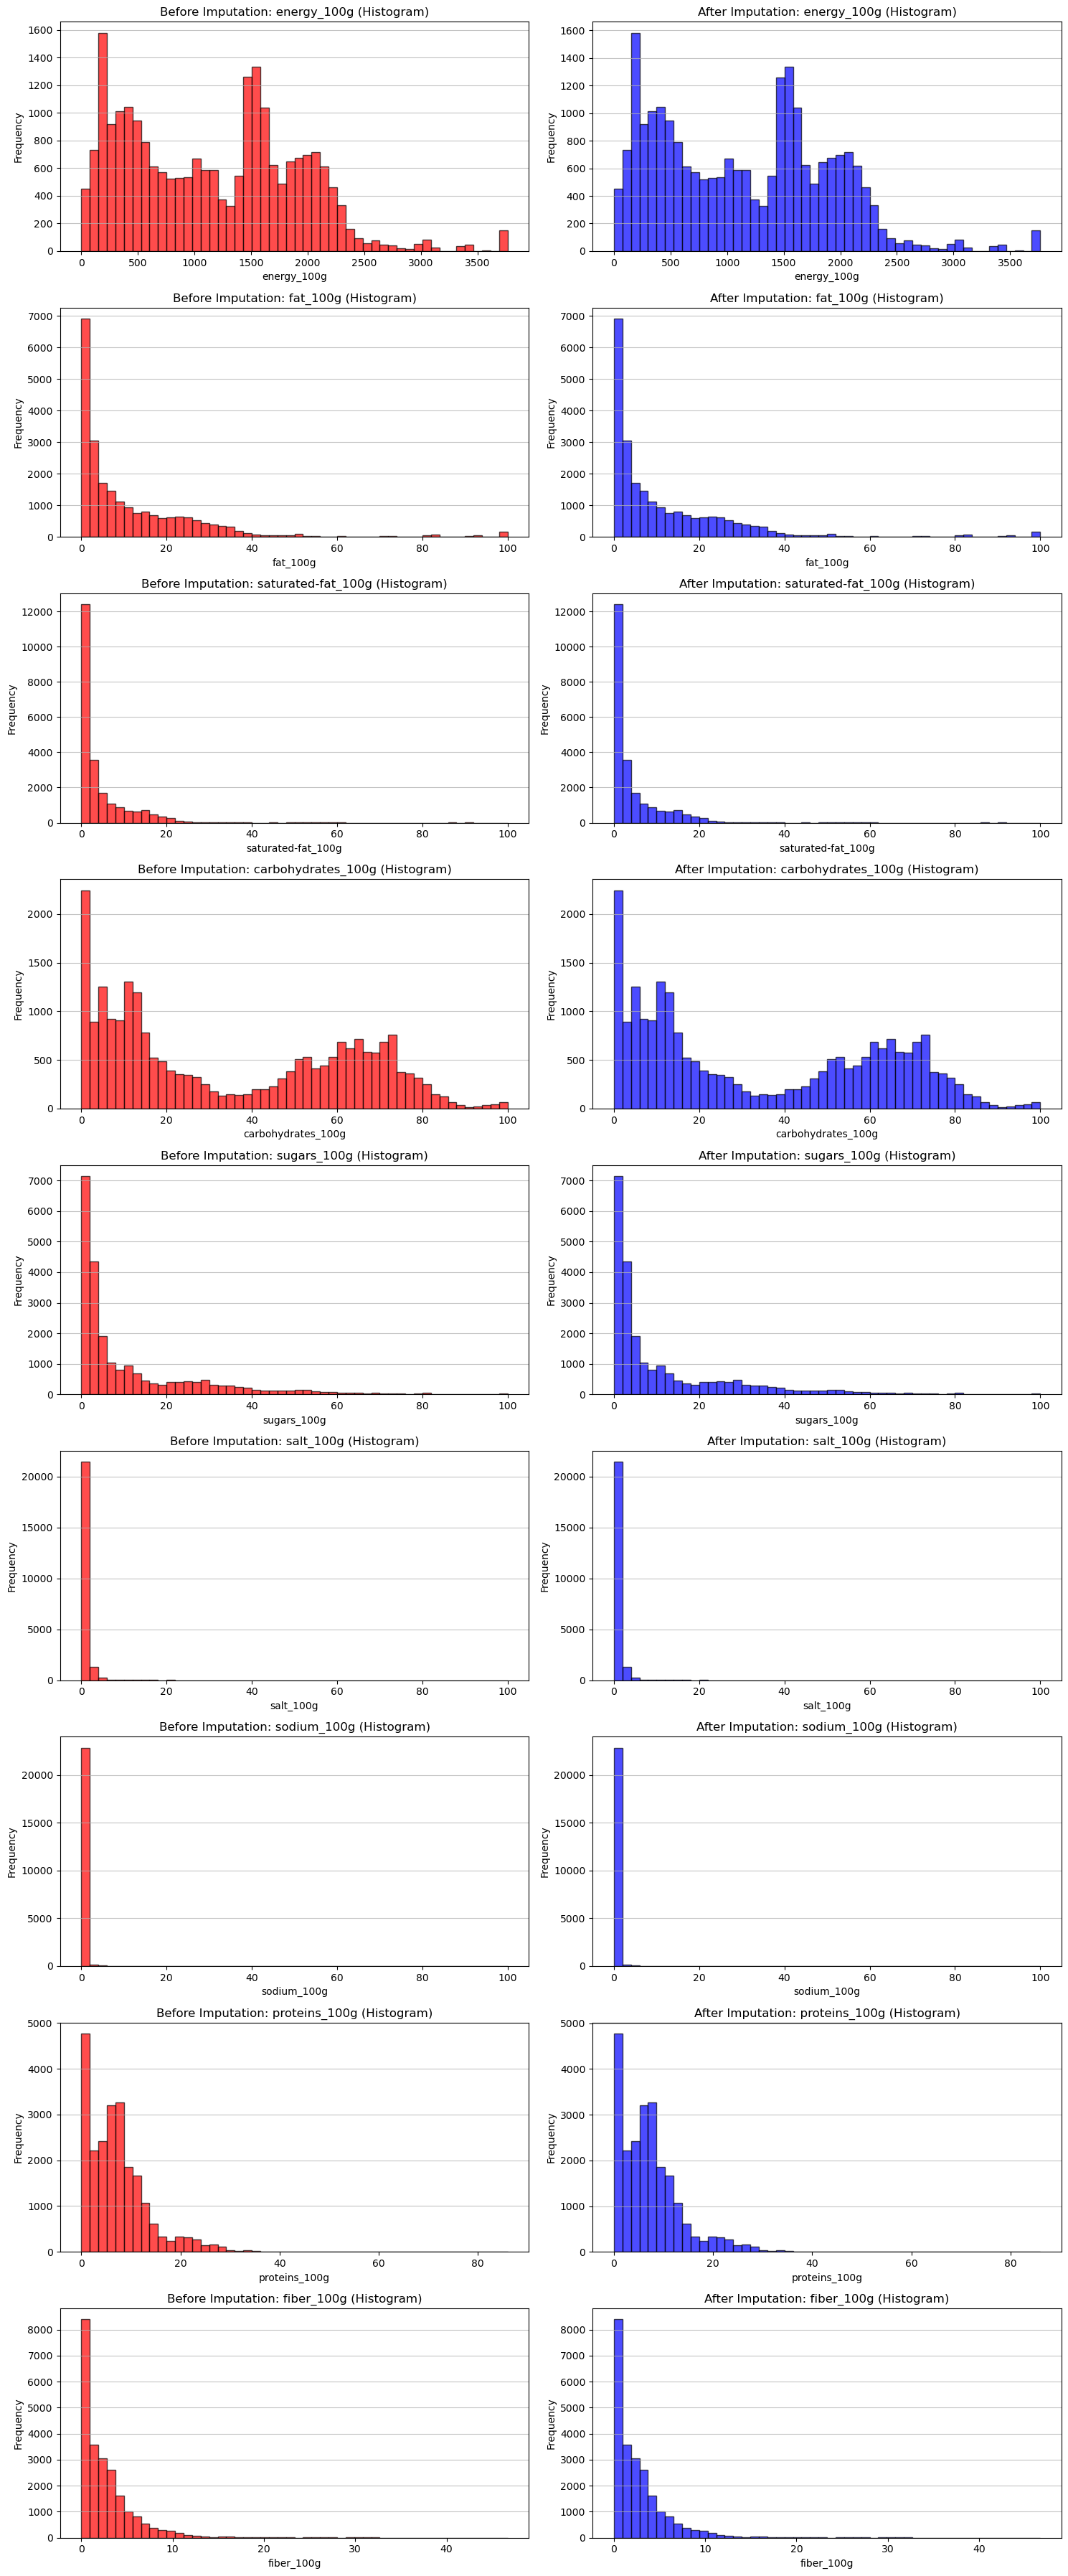

In [81]:
# Fonction pour afficher les histogrammes avant et après imputation
def plot_histograms_before_after(df_before, df_after, features):
    num_features = len(features)
    plt.figure(figsize=(15, 4 * num_features))

    for i, feature in enumerate(features, 1):
        plt.subplot(num_features, 2, 2*i-1)
        plt.hist(df_before[feature].dropna(), bins=50, color='red', edgecolor='black', alpha=0.7)
        plt.title(f'Before Imputation: {feature} (Histogram)')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)

        plt.subplot(num_features, 2, 2*i)
        plt.hist(df_after[feature].dropna(), bins=50, color='blue', edgecolor='black', alpha=0.7)
        plt.title(f'After Imputation: {feature} (Histogram)')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)

    plt.tight_layout()
    plt.show()

# Liste des variables quantitatives
quantitative_features = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                    'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g',
]

# Afficher les histogrammes avant et après imputation
plot_histograms_before_after(X_before_imputation, X_cleaned, quantitative_features)

Affichage graphique du remplissage des colonnes


<Axes: >

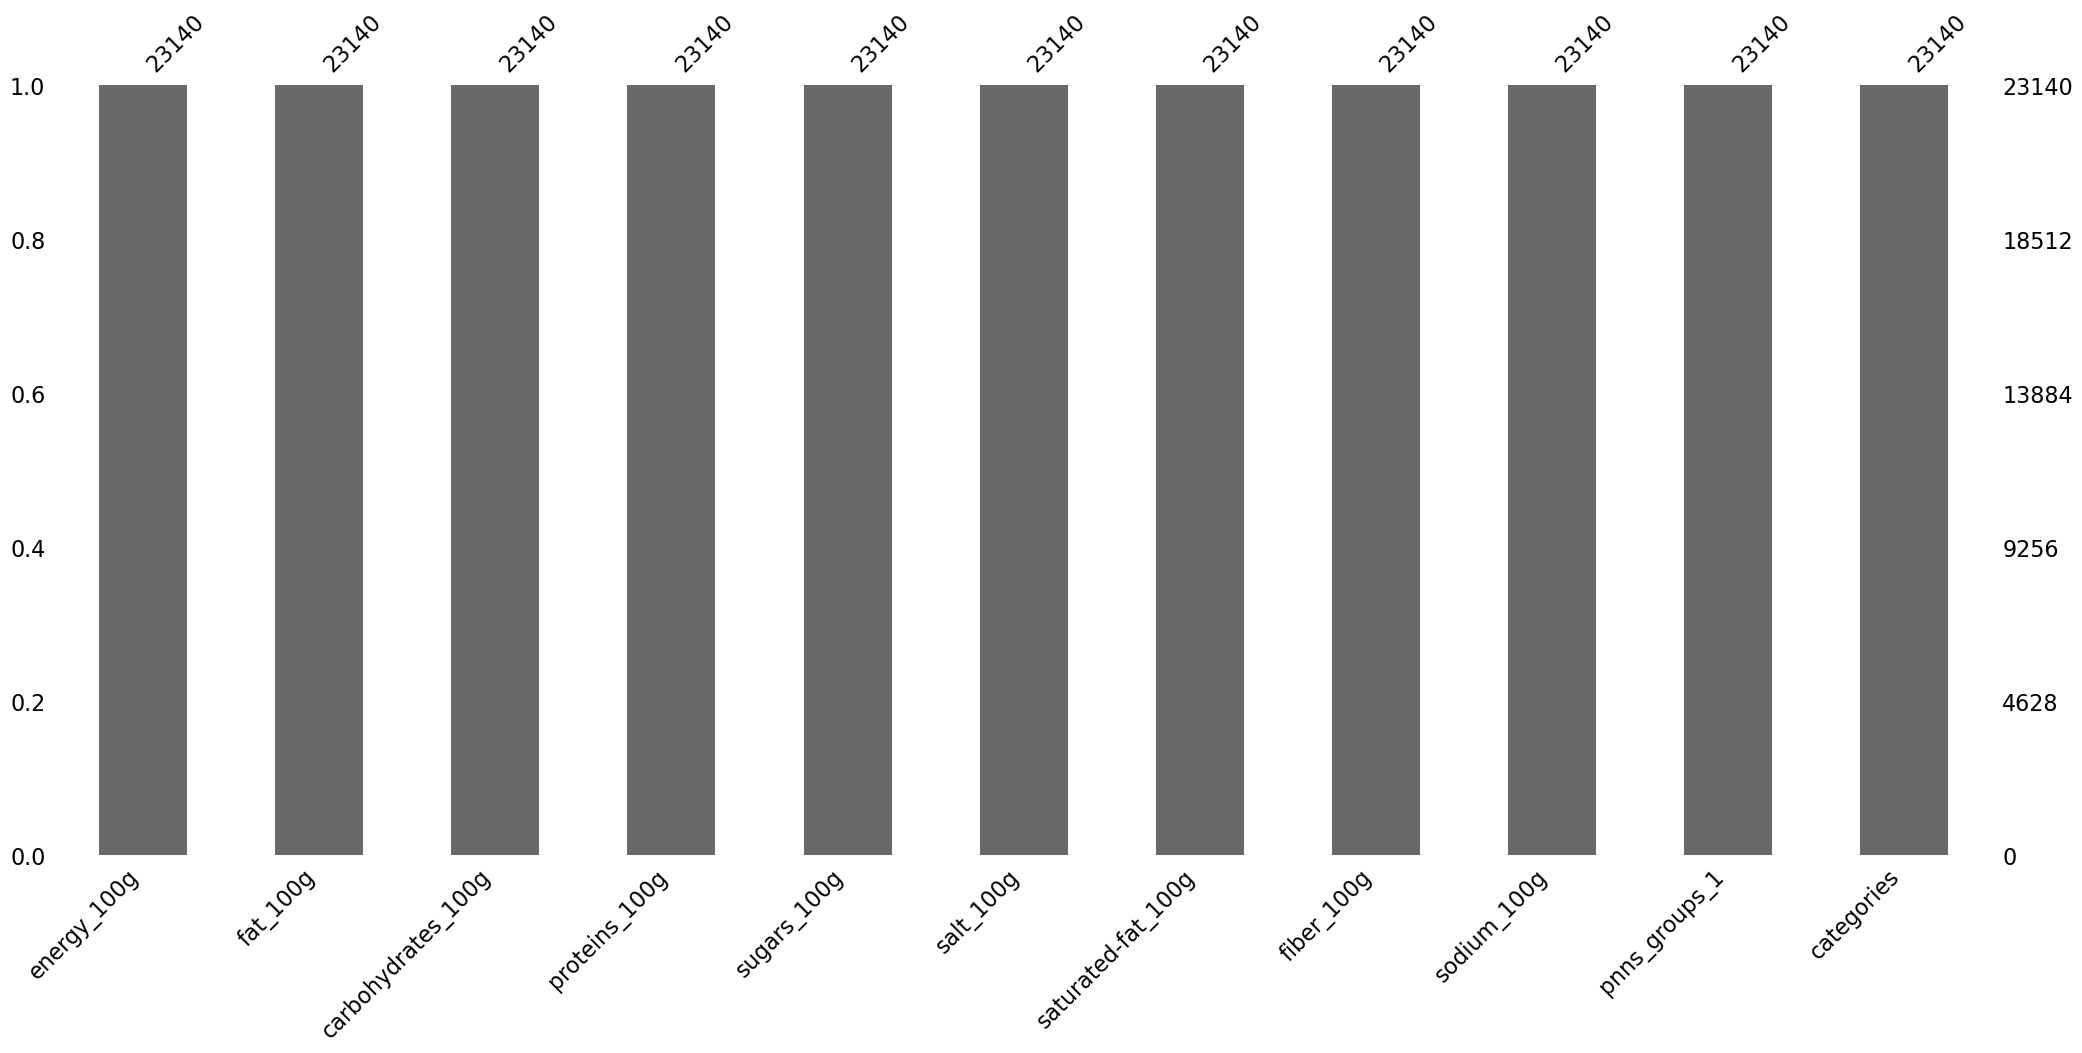

In [82]:
# Représentation visuelle du taux de remplissage du data frame nettoyé, avant analyse
print("Affichage graphique du remplissage des colonnes")
msno.bar(X_cleaned)

Le jeu de données est nettoyé de toutes valeurs manquantes ou aberrantes, on peut procéder aux analyses.

## 5. Réalisation des analyses uni-variées et bi-variées <a class="anchor" id="partie5"></a>

### 5.1. Analyses uni-variées <a class="anchor" id="partie5.1"></a>

#### 5.1.1 variables quantitatives <a class="anchor" id="partie5.1.1"></a>

In [86]:
# Statistiques descriptives pour les variables quantitatives
print(X_cleaned.describe())

        energy_100g      fat_100g  carbohydrates_100g  proteins_100g  \
count  23140.000000  23140.000000        23140.000000   23140.000000   
mean    1157.166758     11.821502           34.571226       7.243316   
std      756.151587     15.854198           27.926042       6.275111   
min        0.000000      0.000000            0.000000       0.000000   
25%      455.000000      1.500000            9.000000       2.800000   
50%     1138.000000      5.800000           25.650000       6.300000   
75%     1700.000000     17.525000           62.000000      10.000000   
max     3766.000000    100.000000          100.000000      86.000000   

        sugars_100g     salt_100g  saturated-fat_100g    fiber_100g  \
count  23140.000000  23140.000000        23140.000000  23140.000000   
mean      11.788449      0.830401            4.368846      2.585733   
std       16.348542      1.946035            7.132717      3.181302   
min        0.000000      0.000000            0.000000      0.000000

##### Visualisation de la distribution des variables quantitatives et calcul du Skewness

Skewness de energy_100g: 0.43
Skewness de fat_100g: 2.70
Skewness de saturated-fat_100g: 4.10
Skewness de carbohydrates_100g: 0.29
Skewness de sugars_100g: 2.07
Skewness de salt_100g: 24.25
Skewness de sodium_100g: 56.92
Skewness de proteins_100g: 1.62
Skewness de fiber_100g: 2.89


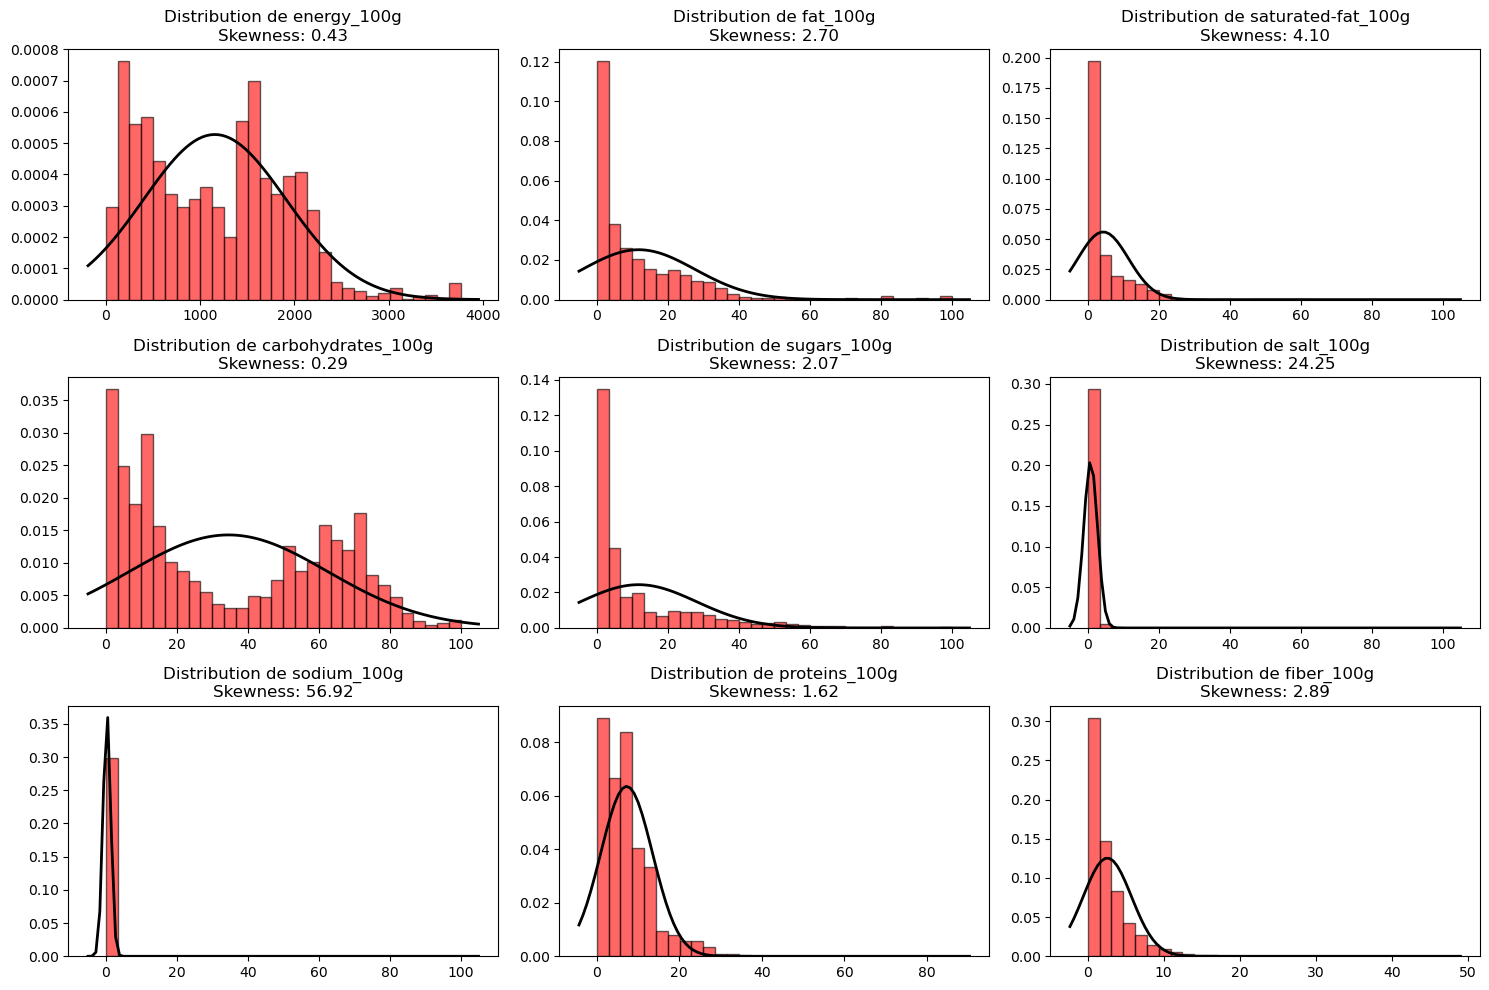

In [88]:
# Calculer le skewness pour chaque variable quantitative
quantitative_features = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                    'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g'
]

# Supprimer les avertissements temporaires
warnings.filterwarnings("ignore", category=FutureWarning)

# Calculer et afficher le skewness de chaque variable
skewness_values = {}
for feature in quantitative_features:
    skewness_values[feature] = skew(X_cleaned[feature].dropna())

# Afficher les skewness values
for feature, skewness in skewness_values.items():
    print(f'Skewness de {feature}: {skewness:.2f}')

# Visualiser les distributions avec les valeurs de skewness
plt.figure(figsize=(15, 10))
for i, feature in enumerate(quantitative_features, 1):
    plt.subplot(3, 3, i)
    data = X_cleaned[feature].dropna()
    
    # Histogramme
    counts, bins, patches = plt.hist(data, bins=30, density=True, alpha=0.6, color='r', edgecolor='black')

    # Courbe de densité
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p,'k', linewidth=2)
    
    plt.title(f'Distribution de {feature}\nSkewness: {skewness_values[feature]:.2f}')
    
plt.tight_layout()
plt.show()

# Réactiver les avertissements
warnings.filterwarnings("default", category=FutureWarning)

Les résultats du skewness montrent une asymétrie marquée dans plusieurs variables quantitatives de notre dataset. Voici les points clés :

- Asymétrie à droite : La majorité des variables présentent une forte asymétrie à droite, ce qui signifie que la plupart des produits ont des valeurs faibles à moyennes pour ces variables, avec quelques produits ayant des valeurs très élevées.
- Variabilité des distributions : Certaines variables, comme salt_100g et sodium_100g, ont une skewness extrêmement élevée, suggérant des distributions très asymétriques et des produits très atypiques.
- Interprétation des valeurs aberrantes : Les valeurs aberrantes restantes sont des valeurs atypiques vérifiées, ce qui indique qu'elles sont des caractéristiques réelles de certains produits et non des erreurs de saisie.
- Impact potentiel sur la modélisation : L'asymétrie des distributions peut affecter les performances des algorithmes de machine learning. Il peut être utile d'appliquer des transformations pour obtenir des distributions plus symétriques, facilitant ainsi les analyses et les modèles prédictifs.

##### Visualisation de la distribution des valeurs aberrantes restantes (atypiques)

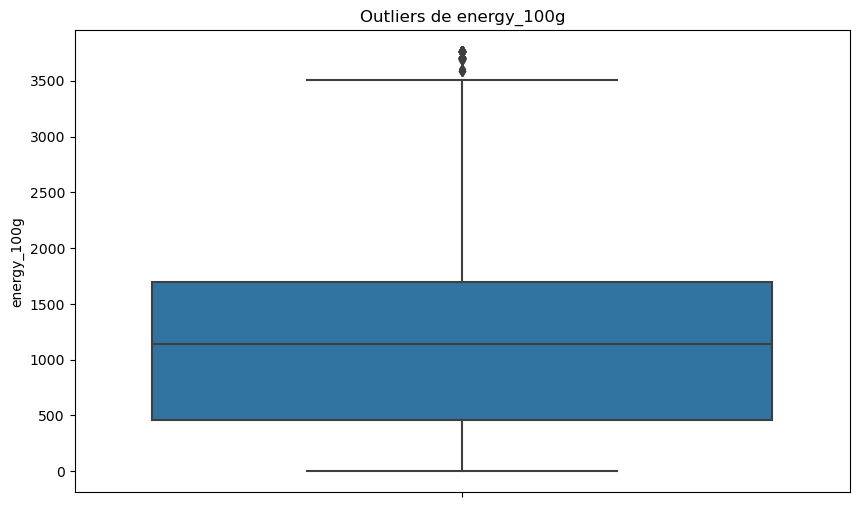

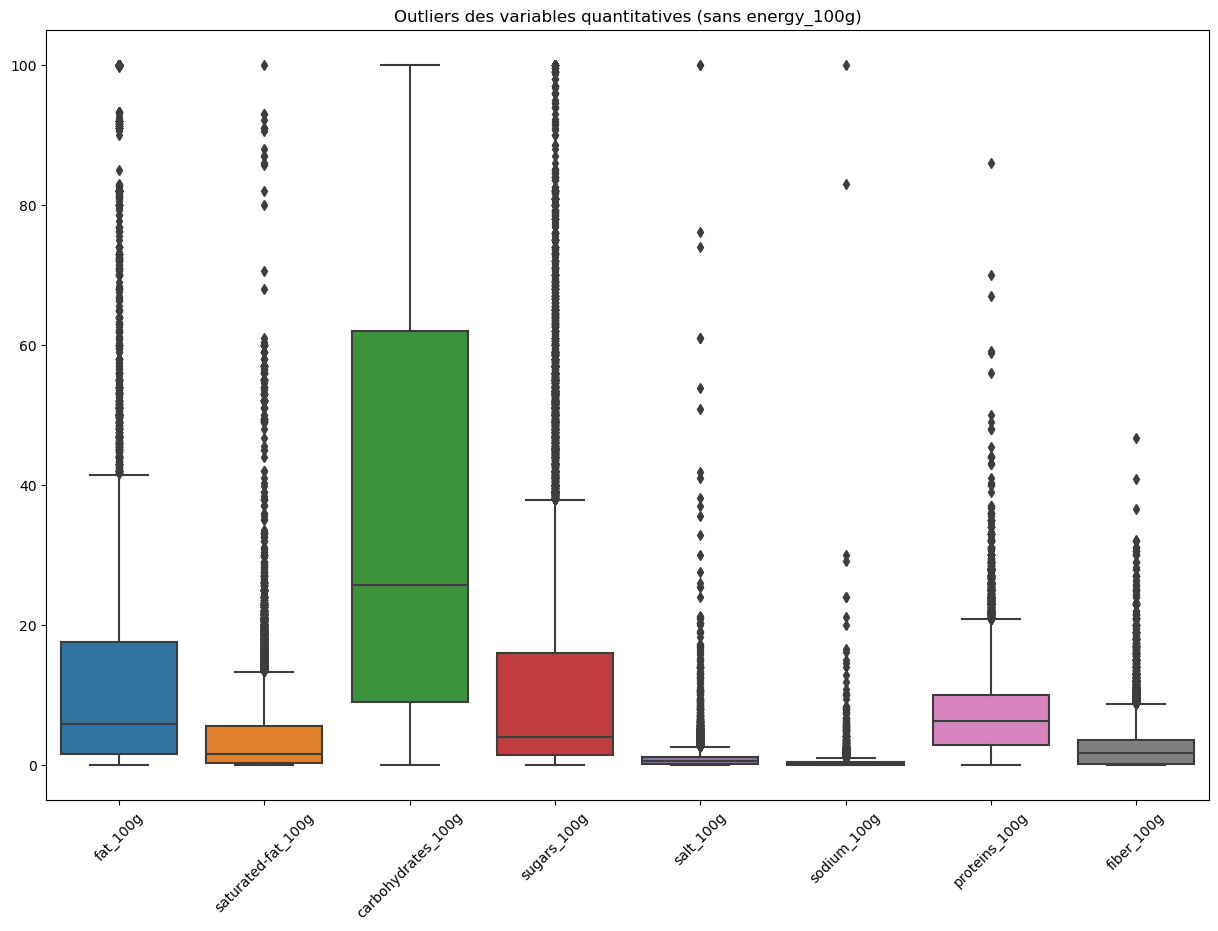

In [92]:
# Liste des variables quantitatives sans 'energy_100g'
quantitative_features_no_energy = [
    'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                    'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g'
]

# Boxplot pour 'energy_100g'
plt.figure(figsize=(10, 6))
sns.boxplot(y=X_cleaned['energy_100g'])
plt.title('Outliers de energy_100g')
plt.ylabel('energy_100g')
plt.show()

# Boxplots pour les autres variables quantitatives
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_cleaned[quantitative_features_no_energy])
plt.title('Outliers des variables quantitatives (sans energy_100g)')
plt.xticks(rotation=45)
plt.show()

Le diagramme en boîte à moustaches montre une grande variabilité et de nombreuses valeurs aberrantes pour plusieurs variables. Voici quelques points clés:
- Graisses et Graisses Saturées : Beaucoup de produits ont des valeurs très élevées, indiquant une large gamme de teneur en graisses.
- Glucides et Sucres : Les valeurs élevées dans ces catégories montrent la présence de produits très riches en glucides et en sucres.
- Sel et Sodium : Les valeurs très élevées en sodium et en sel sont suspectes et pourraient nécessiter une vérification supplémentaire.
- Protéines et Fibres : La majorité des produits ont une teneur modérée en protéines et en fibres, mais certains produits sont extrêmement riches en ces nutriments.

Après vérification, il existe bel et bien des produits correspondants aux valeurs atypiques que l'on remarque, exemples:
- huile de tournesol (100g de graisses et 3766 Kj d'énergie)
- chocolat kinder chocobons (52g de sucres)
- sel la baleine (97 g de sel)
- tartines Wasa (26g de fibres)

#### 5.1.2 variables qualitatives <a class="anchor" id="partie5.1.2"></a>

##### la variable pnns_groups_1

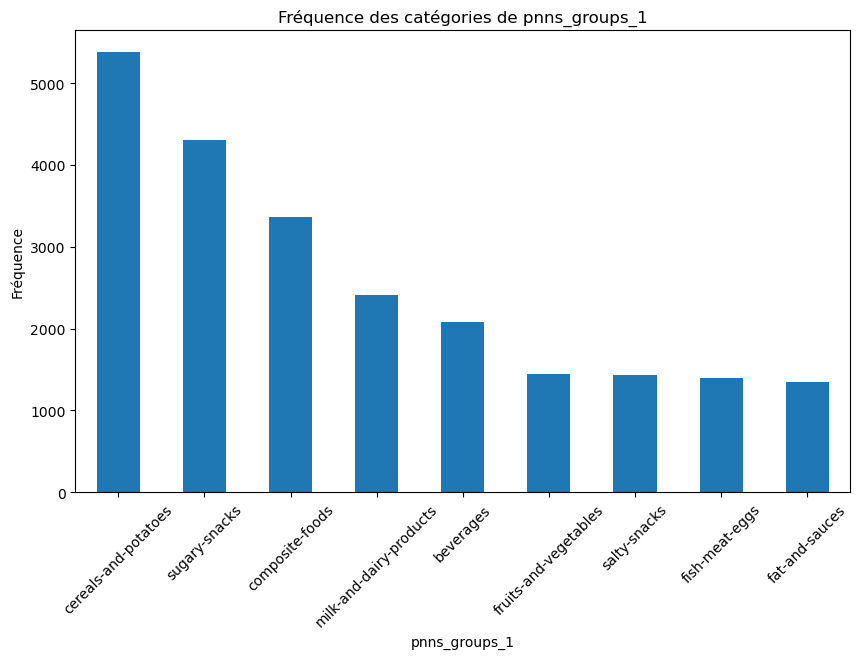

In [97]:
# Fréquences et diagrammes en barres pour pnns_groups_1
plt.figure(figsize=(10, 6))
X_cleaned['pnns_groups_1'].value_counts().plot(kind='bar')
plt.title('Fréquence des catégories de pnns_groups_1')
plt.xlabel('pnns_groups_1')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

##### la variable cible pnns_groups_2

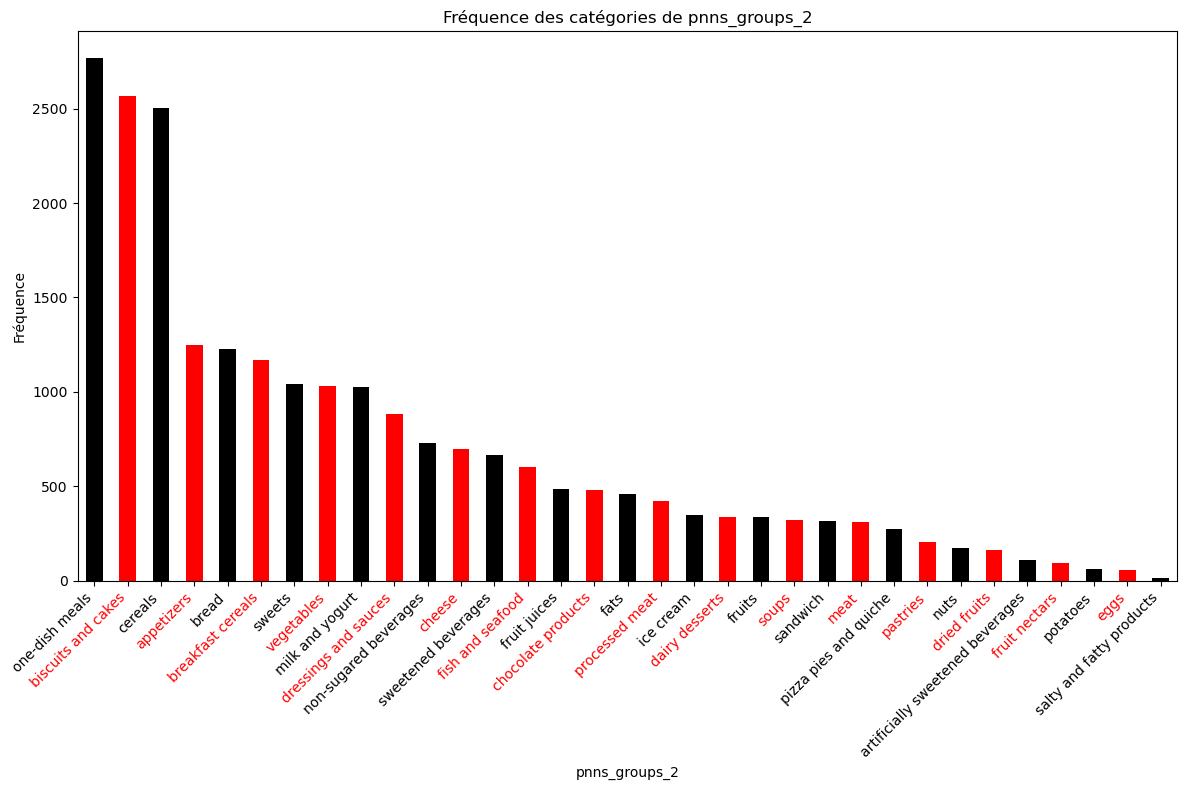

In [99]:
# Compter les occurrences de chaque catégorie dans pnns_groups_2
pnns_groups_2_counts = y.value_counts()

# Créer un diagramme en barres avec des couleurs alternées
plt.figure(figsize=(12, 8))

# Définir les couleurs alternées
colors = ['black', 'red']
bar_colors = [colors[i % len(colors)] for i in range(len(pnns_groups_2_counts))]

# Créer le diagramme en barres avec les couleurs spécifiées
pnns_groups_2_counts.plot(kind='bar', color=bar_colors)

# Modifier la couleur des étiquettes de l'axe des abscisses
ax = plt.gca()
xticklabels = ax.get_xticklabels()
for i, label in enumerate(xticklabels):
    label.set_color(bar_colors[i])
    
plt.title('Fréquence des catégories de pnns_groups_2')
plt.xlabel('pnns_groups_2')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')  # Incliner les étiquettes à 45 degrés et les aligner à droite
plt.tight_layout()  # Ajuster la disposition pour éviter le chevauchement
plt.show()

Ce diagramme met en évidence les catégories les plus et les moins fréquentes. Les catégories les plus courantes, comme les plats uniques et les biscuits et gâteaux, dominent le dataset, tandis que des catégories comme les produits salés et gras et les œufs sont rares. Cette visualisation est essentielle pour comprendre la distribution des données et identifier les catégories qui pourraient nécessiter une attention particulière dans les analyses ultérieures.

### 5.2. Analyses bi-variées <a class="anchor" id="partie5.2"></a>

Pour choisir quelles variables nous analyser nous allons nous reposer sur une matrice des correlations.

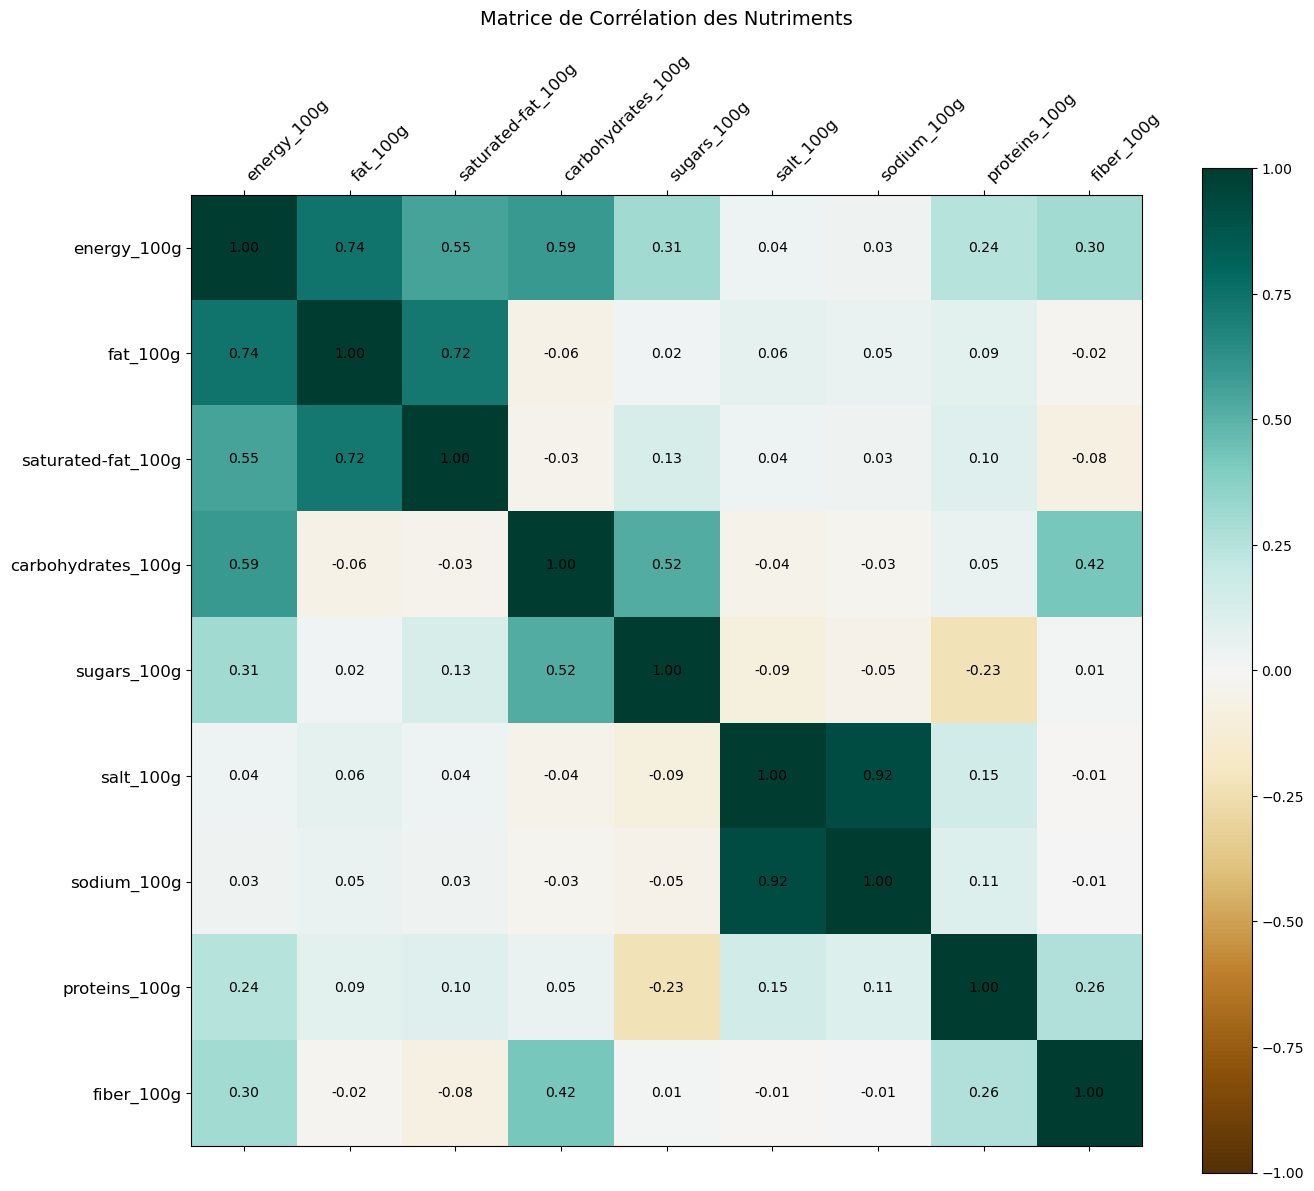

In [103]:
# Seaborn a posé probleme, il n'affichait pas les annotations partout, donc j'ai fait la matrice avec Matplotlyb.

# Calculer la matrice de corrélation
corr_matrix = X_cleaned[quantitative_features].corr()

# Configurer la figure et l'axe
fig, ax = plt.subplots(figsize=(14, 12))

# Créer la heatmap
cax = ax.matshow(corr_matrix, cmap='BrBG', vmin=-1, vmax=1)

# Ajouter la barre de couleur
fig.colorbar(cax)

# Configurer les ticks
ax.set_xticks(np.arange(len(quantitative_features)))
ax.set_yticks(np.arange(len(quantitative_features)))

# Ajouter les labels
ax.set_xticklabels(quantitative_features, rotation=45, ha='left', fontsize=12)
ax.set_yticklabels(quantitative_features, fontsize=12)

# Ajouter les annotations
for i in range(len(quantitative_features)):
    for j in range(len(quantitative_features)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black", fontsize=10)

# Ajouter un titre
plt.title('Matrice de Corrélation des Nutriments', fontdict={'fontsize': 14}, pad=20)

# Ajuster la mise en page
plt.tight_layout()

# Afficher la heatmap
plt.show()

##### Observations

- Corrélations Fortes :
    - energy_100g et fat_100g : Corrélation de 0.74. La quantité d'énergie est fortement corrélée avec la quantité de graisses, ce qui est attendu car les graisses sont une source d'énergie.
    - fat_100g et saturated-fat_100g : Corrélation de 0.72. Cela indique une forte relation positive entre la quantité de graisses et la quantité de graisses saturées dans les produits.
    - sodium_100g et salt_100g : Corrélation de 0.92. Il est logique que ces deux variables soient fortement corrélées car le sodium est un composant principal du sel.

- Corrélations Modérées :
    - carbohydrates_100g et sugars_100g : Corrélation de 0.52. Les glucides sont souvent composés de sucres, d'où cette corrélation modérée.
    - carbohydrates_100g et fiber_100g : Corrélation de 0.42. Cela indique qu'une proportion notable des glucides dans certains produits peut provenir de fibres.

- Corrélations Faibles ou Négatives :
    - fat_100g et carbohydrates_100g : Corrélation de -0.06. Cela montre qu'il n'y a pratiquement aucune relation entre la quantité de graisses et la quantité de glucides dans les produits.
    - saturated-fat_100g et fiber_100g : Corrélation de -0.08. Une faible corrélation négative suggère que ces nutriments ne sont pas souvent présents ensemble dans les produits.

##### Analyse des variables quantitatives avec une forte corrélation entre elles

##### création d'une fonction pour afficher un diagramme de dispersion avec 2 variables

In [107]:
def scatter_plot_with_correlation(df, var1, var2):
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var1, y=var2, data=df)
    
    # Calculer la corrélation de Pearson
    correlation, p_value = pearsonr(df[var1].dropna(), df[var2].dropna())
    
    plt.title(f'Diagramme de dispersion entre {var1} et {var2}\nCorrelation de Pearson: {correlation:.2f}', pad=15)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()
    
    print(f'Correlation de Pearson entre {var1} et {var2}: {correlation:.2f}')
    print(f'P-value: {p_value:.2e}')


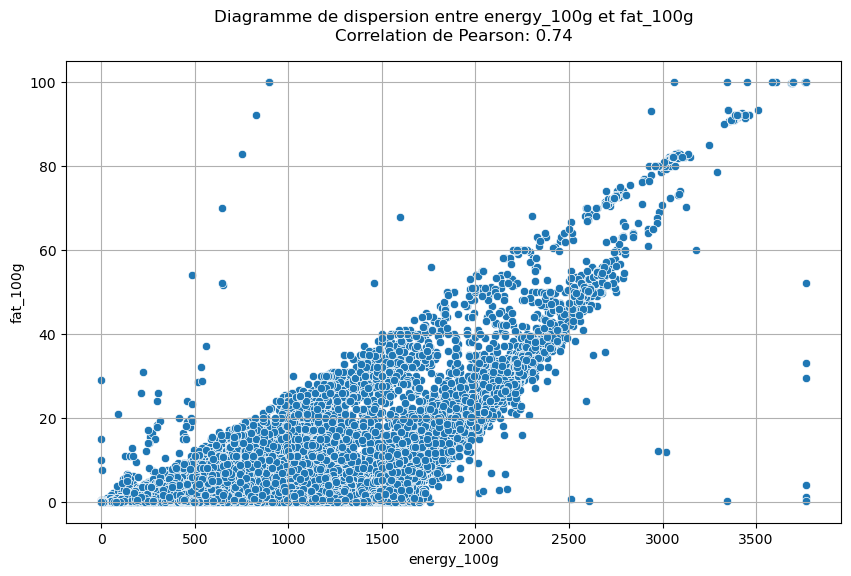

Correlation de Pearson entre energy_100g et fat_100g: 0.74
P-value: 0.00e+00


In [108]:
# Utiliser la fonction pour les variables 'energy_100g' et 'fat_100g'
scatter_plot_with_correlation(X_cleaned, 'energy_100g', 'fat_100g')

##### Observations
il existe une corrélation forte et positive entre la teneur en énergie et la teneur en graisses des aliments, bien qu'avec une certaine variabilité et quelques outliers.

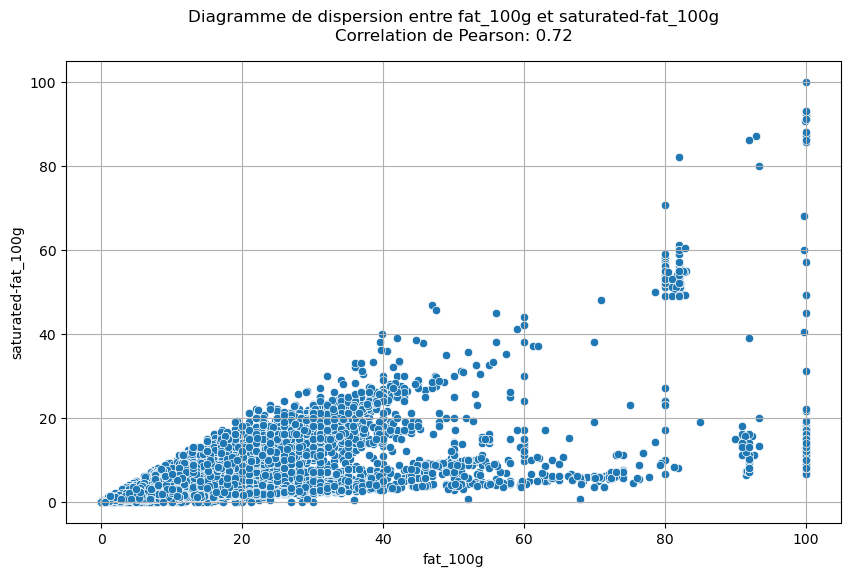

Correlation de Pearson entre fat_100g et saturated-fat_100g: 0.72
P-value: 0.00e+00


In [110]:
# Utiliser la fonction pour les variables 'fat_100g' et 'saturated-fat_100g'
scatter_plot_with_correlation(X_cleaned, 'fat_100g', 'saturated-fat_100g')

##### Observations
les graisses totales et les graisses saturées sont fortement corrélées, mais avec une certaine variabilité dans la relation, spécialement aux extrémités supérieures des distributions.

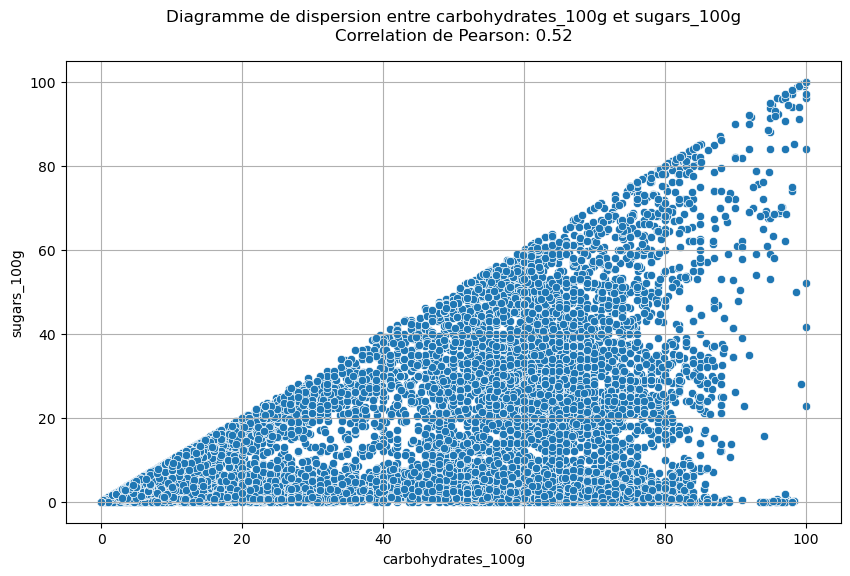

Correlation de Pearson entre carbohydrates_100g et sugars_100g: 0.52
P-value: 0.00e+00


In [112]:
# Utiliser la fonction pour les variables 'carbohydrates_100g' et 'sugars_100g'
scatter_plot_with_correlation(X_cleaned, 'carbohydrates_100g', 'sugars_100g')

##### Observations
Bien que les glucides et les sucres soient liés, la variabilité entre les types d'aliments entraîne une corrélation modérée, montrant que d'autres facteurs peuvent influencer la teneur en sucre des aliments riches en glucides.

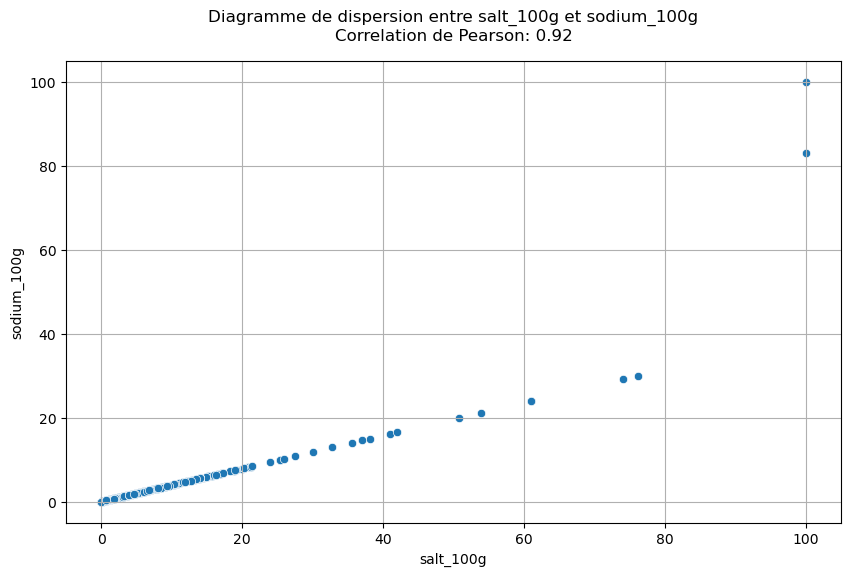

Correlation de Pearson entre salt_100g et sodium_100g: 0.92
P-value: 0.00e+00


In [114]:
# Utiliser la fonction pour les variables 'salt_100g' et 'sodium_100g'
scatter_plot_with_correlation(X_cleaned, 'salt_100g', 'sodium_100g')

##### Observations
Le sel et le sodium dans les aliments sont très fortement corrélés, et l'analyse montre une relation linéaire presque parfaite entre ces deux composants.

##### Analyse de la distribution des variables quantitatives au sein de la variable pnns_groups_2

In [117]:
def plot_boxplot_with_comment(df, y, feature):
   
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=y, y=df[feature])
    plt.title(f'Distribution de {feature} en fonction de pnns_groups_2', pad=20)
    plt.xlabel('pnns_groups_2')
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.show()


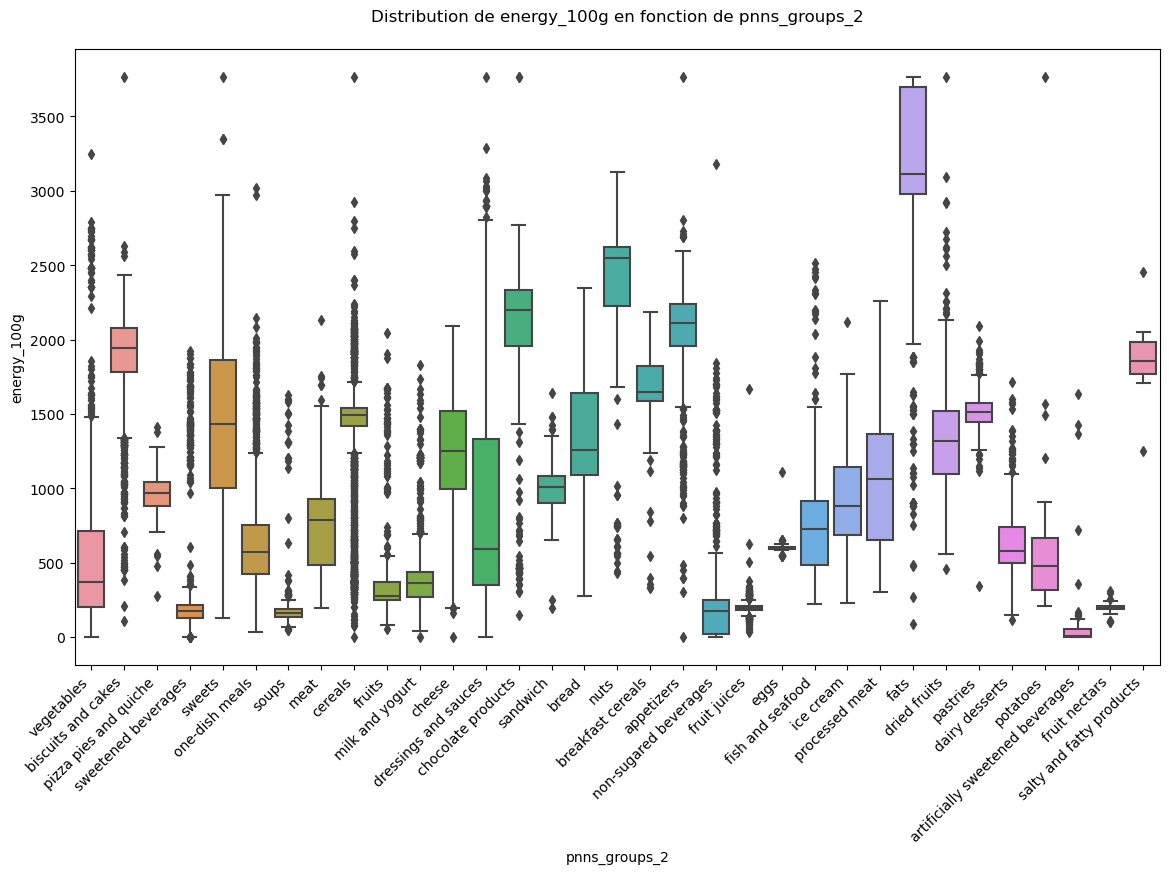

In [118]:
plot_boxplot_with_comment(X_cleaned, y, 'energy_100g')

##### Observations : Energy_100g / pnns_groups_2
- Les catégories comme fats, biscuits and cakes, et pizza pies and quiche montrent des valeurs médianes et des IQR (interquartile ranges) plus élevés, indiquant une plus grande teneur en énergie par 100g.
- En revanche, des catégories comme vegetables, soups, et non-sugared beverages ont des valeurs médianes plus faibles, ce qui signifie qu'elles sont généralement moins énergétiques.

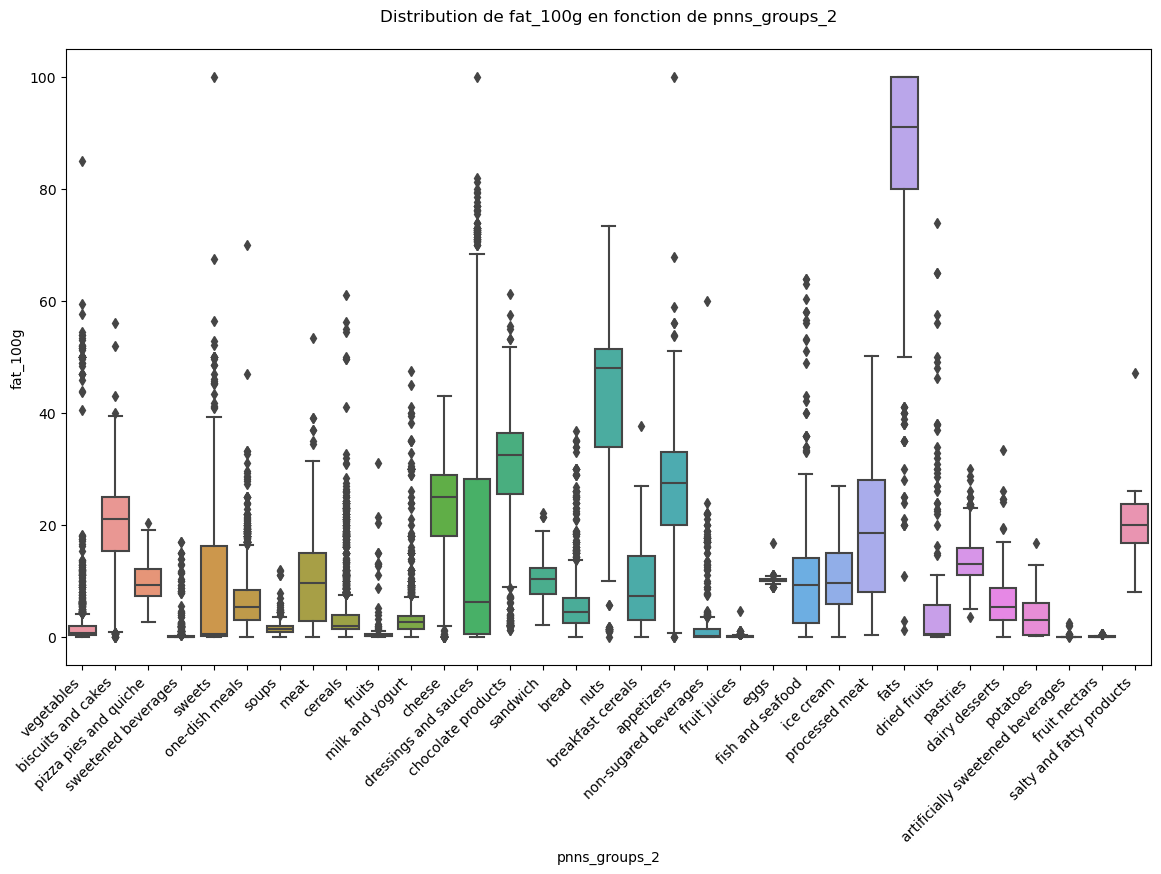

In [120]:
plot_boxplot_with_comment(X_cleaned, y, 'fat_100g')

##### Observations : Fat_100g / pnns_groups_2
- Les catégories fats et chocolate products ont des valeurs médianes très élevées de graisse par 100g, ce qui est attendu vu la nature de ces produits.
- biscuits and cakes, pizza pies and quiche, et processed meat montrent également des valeurs médianes relativement élevées de graisse.
- Les catégories comme vegetables, sweetened beverages, et non-sugared beverages ont des valeurs médianes de graisse proches de zéro, indiquant une faible teneur en graisse.
- one-dish meals et soups montrent une large distribution avec de nombreux outliers, suggérant une grande variabilité de la teneur en graisse au sein de ces catégories.

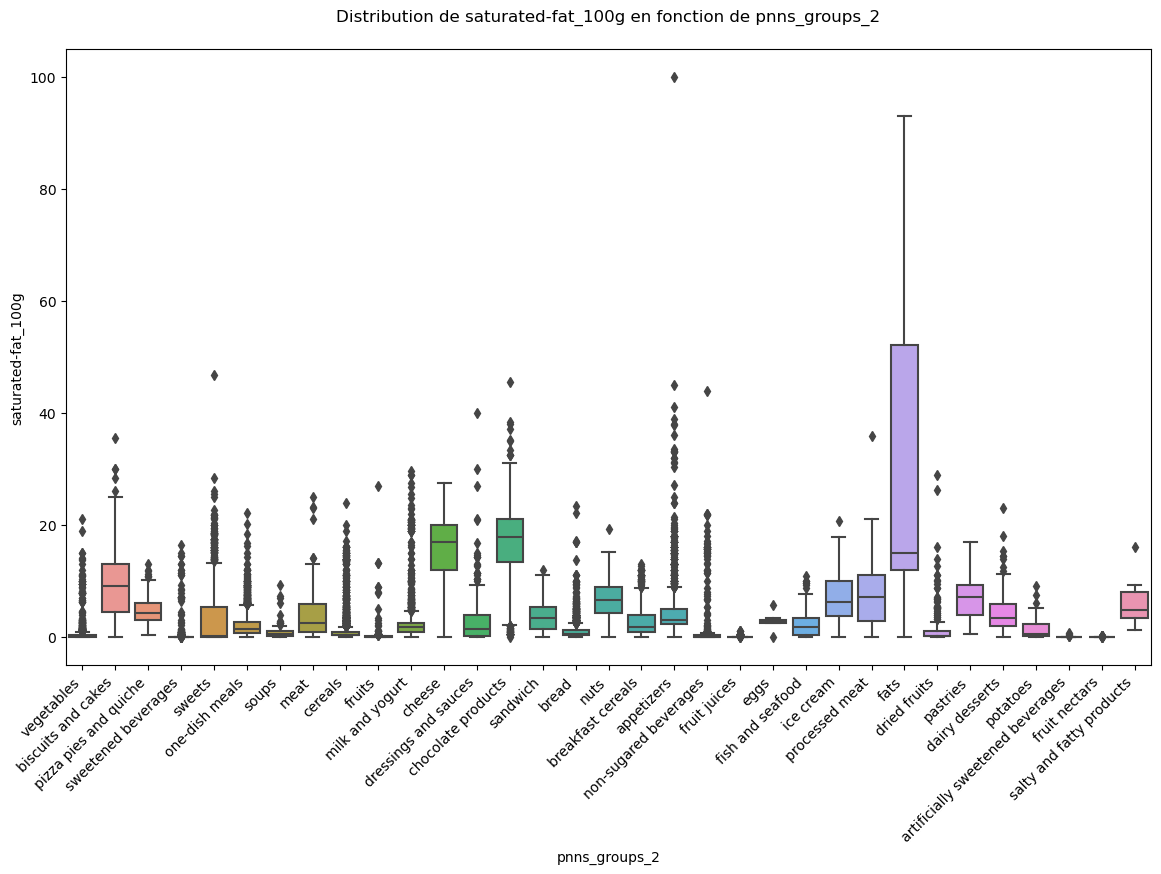

In [122]:
plot_boxplot_with_comment(X_cleaned, y, 'saturated-fat_100g')

##### Observations : saturated_fat_100g / pnns_groups_2
- Les produits de la catégorie "fats" montrent une grande variabilité et des valeurs élevées de graisses saturées, atteignant presque 100g/100g, ce qui est attendu pour cette catégorie.
- Les catégories comme "biscuits and cakes", "chocolate products", "ice cream" et "processed meat" ont des valeurs modérées à élevées de graisses saturées.
- Catégories telles que "vegetables", "fruits", "sweetened beverages", et "non-sugared beverages" montrent des valeurs très faibles de graisses saturées, souvent proches de zéro.

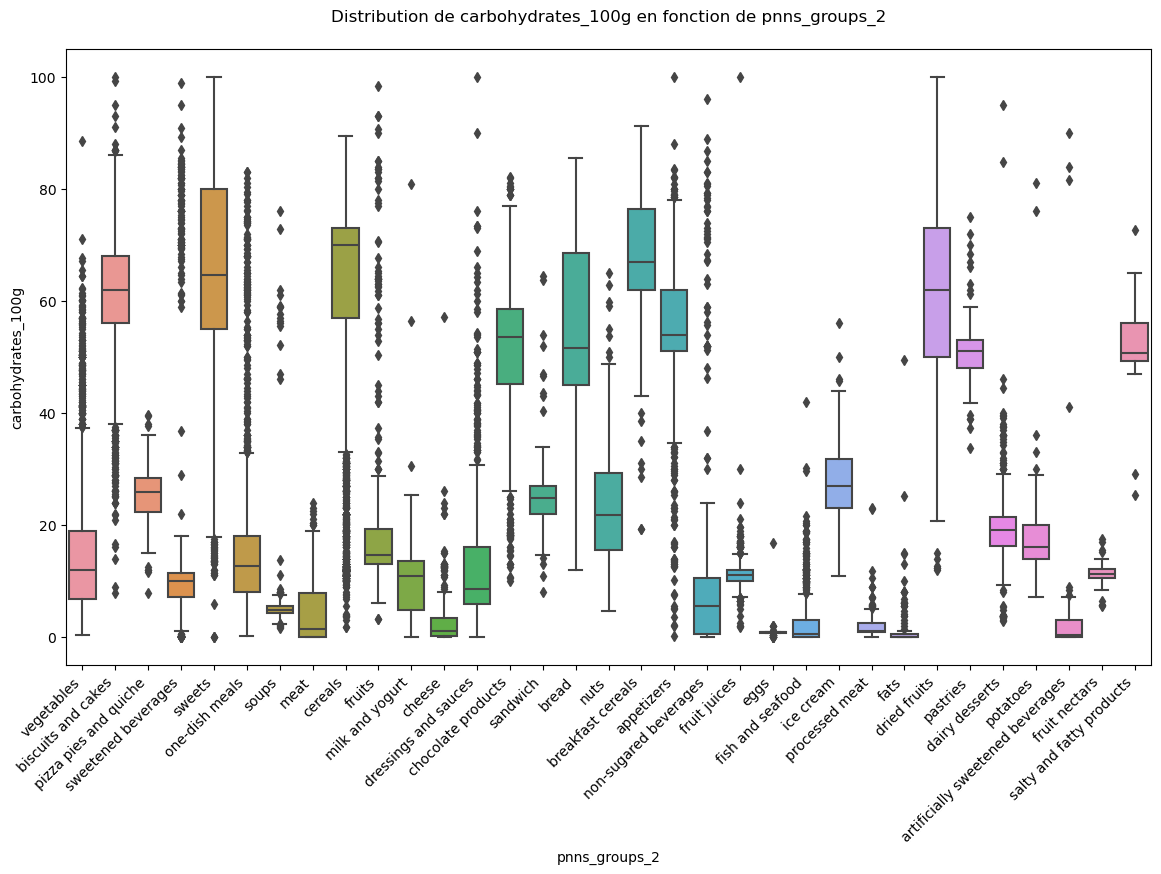

In [124]:
plot_boxplot_with_comment(X_cleaned, y, 'carbohydrates_100g')

##### Observations : carbohydrates_100g / pnns_groups_2
- Les catégories "biscuits and cakes", "breakfast cereals", "sweetened beverages", "fruits", "pastries" et "dried fruits" montrent une grande variabilité et des valeurs élevées en glucides, atteignant souvent jusqu'à 100g/100g.
- Catégories comme "cereals", "fruit juices", "sweets" et "milk and yogurt" présentent des valeurs modérées de glucides, avec des médianes autour de 50g/100g.
- Les catégories "meat", "fish and seafood", "eggs", et "fats" montrent des valeurs très faibles de glucides, souvent proches de zéro, ce qui est attendu pour ces types de produits.

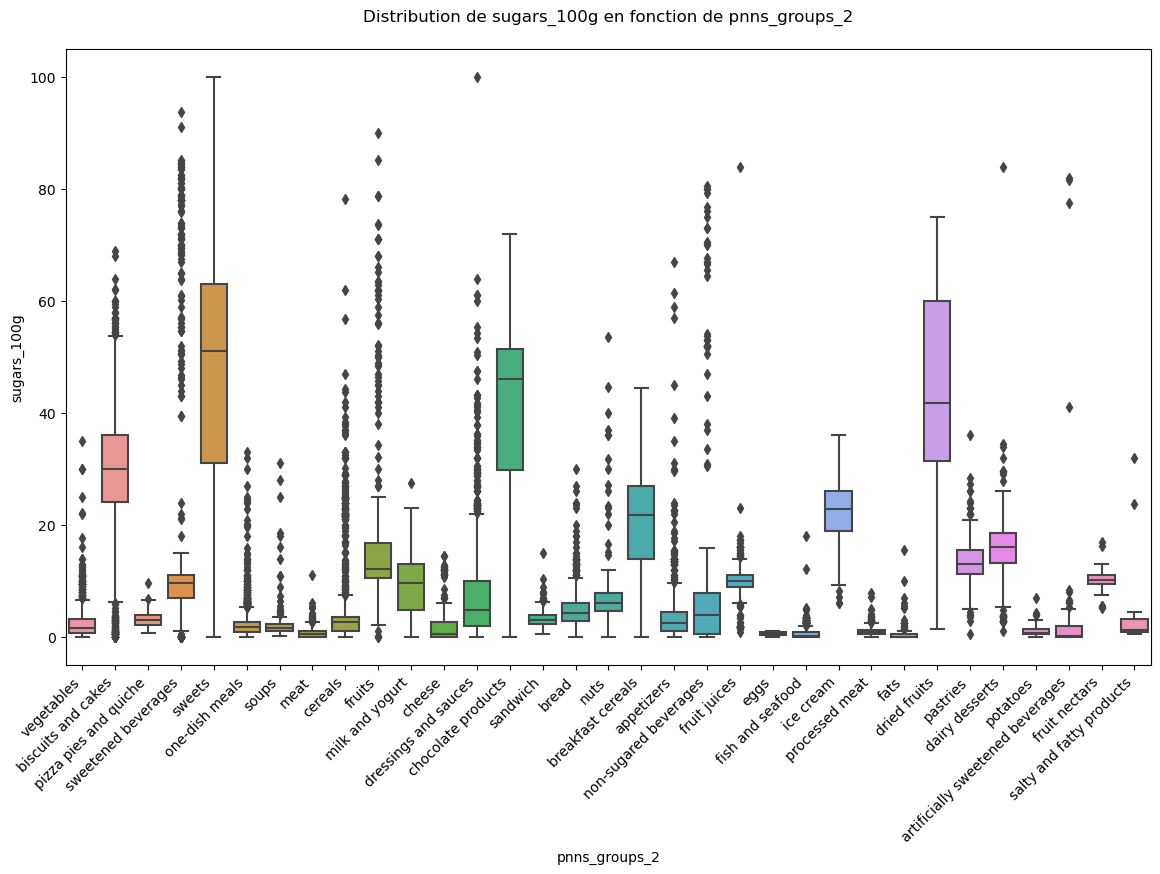

In [126]:
plot_boxplot_with_comment(X_cleaned, y, 'sugars_100g')

##### Observations : sugars_100g / pnns_groups_2
- Les catégories "biscuits and cakes", "sweetened beverages", "breakfast cereals", "sweets", "chocolate products", et "fruit juices" montrent des niveaux élevés de sucre, avec des médianes allant de 20g à 60g par 100g et des valeurs maximales atteignant souvent 100g.
- Les catégories comme "one-dish meals", "milk and yogurt", "fruits", et "ice cream" présentent des médianes plus basses (entre 10g et 30g) mais avec une variabilité notable, indiquée par de nombreuses valeurs aberrantes.
- Les catégories "vegetables", "meat", "fish and seafood", "eggs", "fats", et "potatoes" ont des teneurs en sucre très faibles, souvent proches de zéro, ce qui est cohérent avec les attentes pour ces groupes alimentaires.

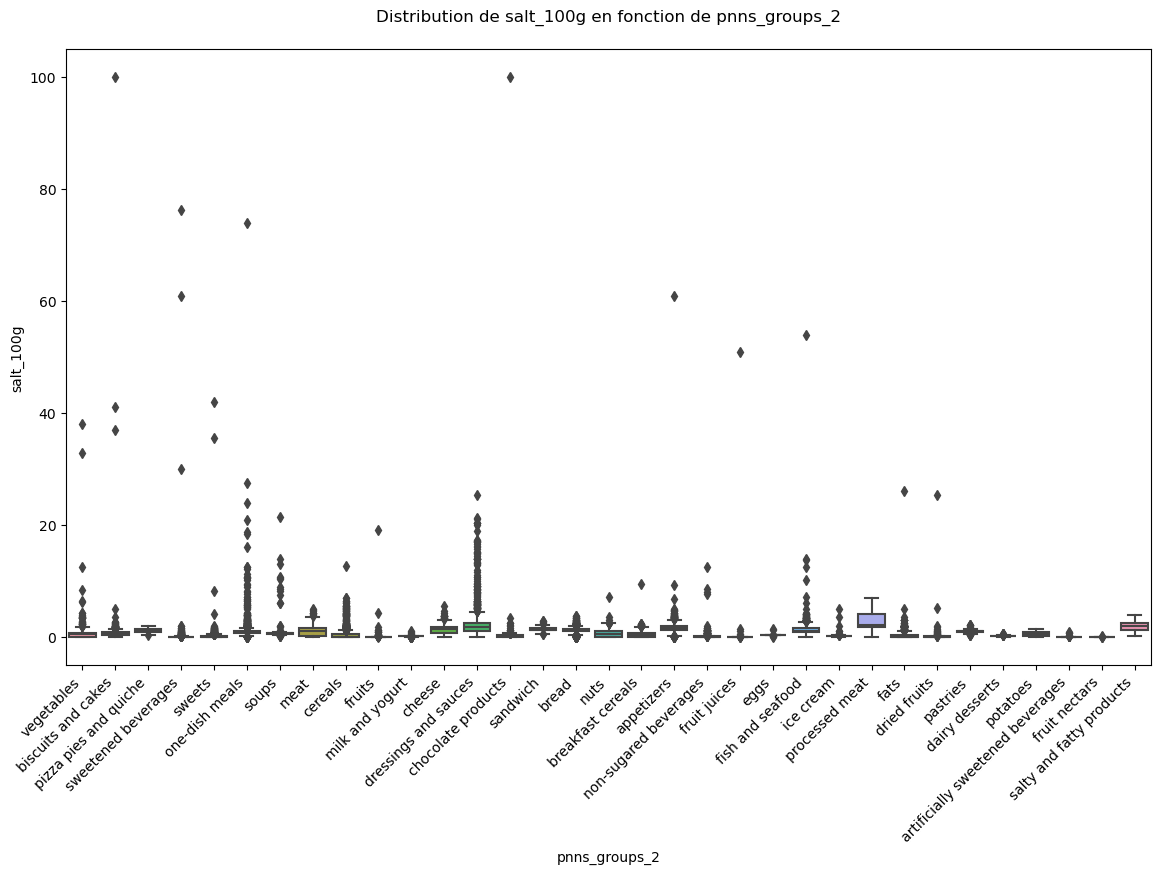

In [128]:
plot_boxplot_with_comment(X_cleaned, y, 'salt_100g')

##### Observations : salt_100g / 
- Les catégories "soups", "dressings and sauces", et "cheese" montrent des niveaux élevés de sel, avec des médianes souvent supérieures à 1g par 100g et des valeurs maximales atteignant ou dépassant 20g.
- Les catégories "one-dish meals" et "processed meat" présentent une grande variabilité, avec des valeurs aberrantes allant jusqu'à 100g de sel par 100g, bien que leurs médianes soient plus basses.
- La majorité des catégories, telles que "vegetables", "fruits", "nuts", et "sweetened beverages", montrent des niveaux très faibles de sel, souvent proches de zéro.

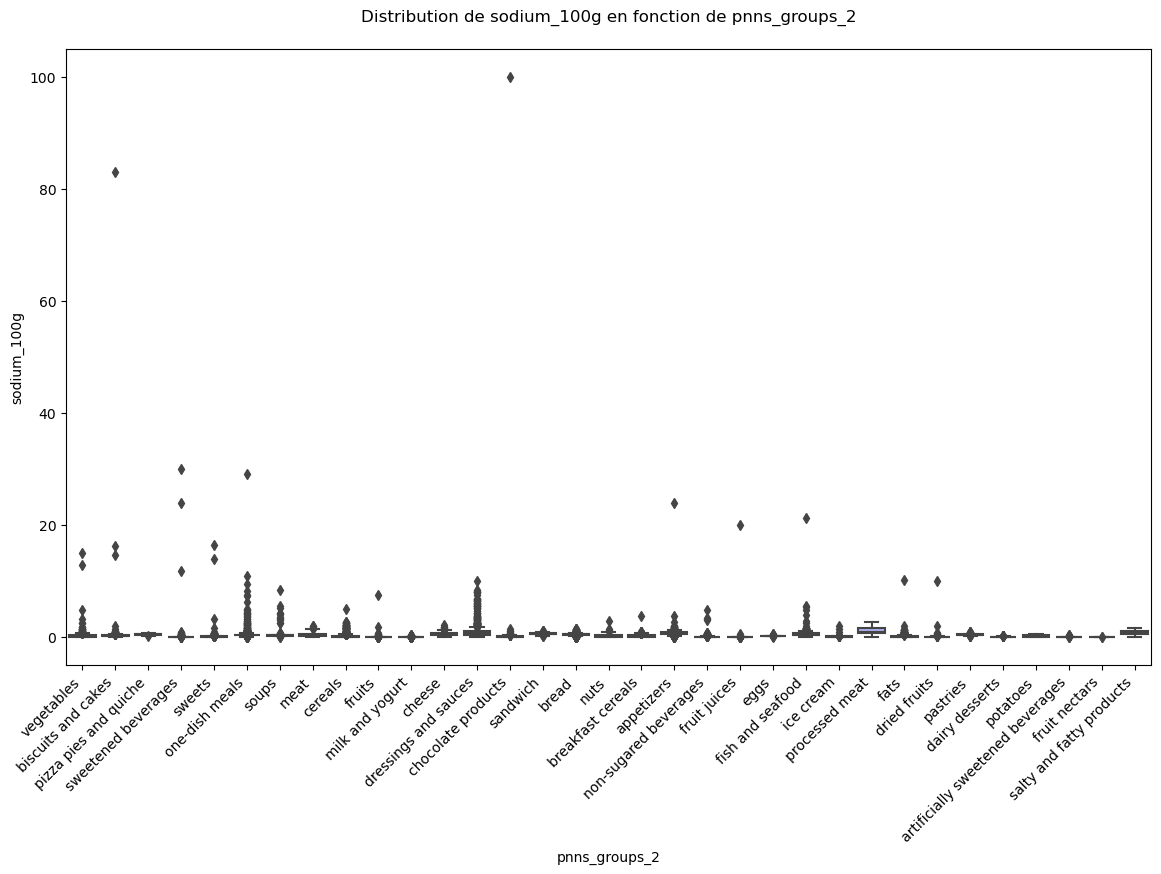

In [130]:
plot_boxplot_with_comment(X_cleaned, y, 'sodium_100g')

##### Observations : sodium_100g / pnns_groups_2
- Les catégories "soups", "dressings and sauces", et "cheese" montrent des niveaux élevés de sodium, avec des médianes souvent supérieures à 1g par 100g et des valeurs maximales atteignant ou dépassant 20g.
- Les catégories "one-dish meals" et "processed meat" présentent une grande variabilité, avec des valeurs aberrantes allant jusqu'à 100g de sodium par 100g, bien que leurs médianes soient plus basses.
- La majorité des catégories, telles que "vegetables", "fruits", "nuts", et "sweetened beverages", montrent des niveaux très faibles de sodium, souvent proches de zéro.

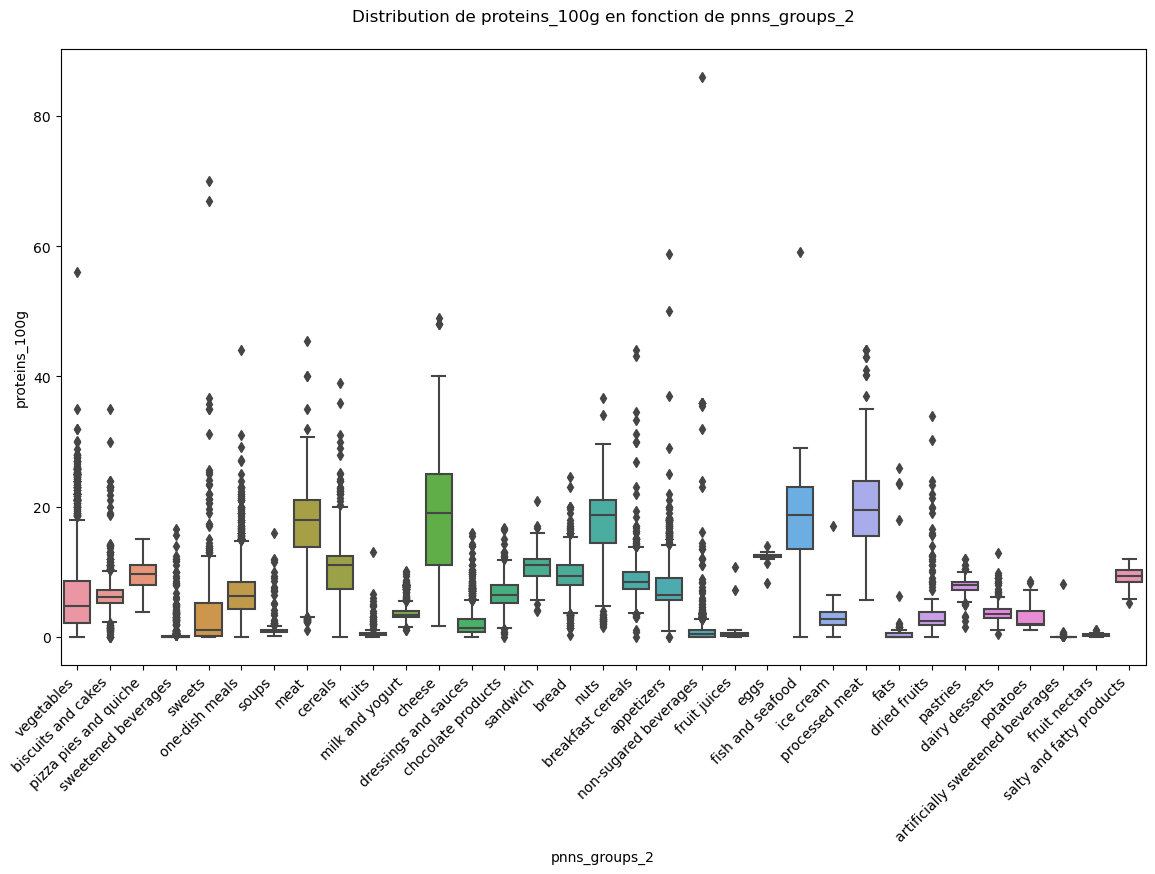

In [132]:
plot_boxplot_with_comment(X_cleaned, y, 'proteins_100g')

##### Observations : proteins_100g / pnns_groups_2
- Les catégories "meat", "fish and seafood", "cheese", et "eggs" montrent des niveaux élevés de protéines, avec des médianes souvent supérieures à 10g par 100g et des valeurs maximales atteignant jusqu'à 80g.
- Les catégories "meat" et "fish and seafood" présentent une grande variabilité, avec des valeurs aberrantes atteignant des niveaux très élevés de protéines.
- Les catégories "sweetened beverages", "fruit juices", "non-sugared beverages", et "pastries" montrent des niveaux très faibles de protéines, souvent proches de zéro.

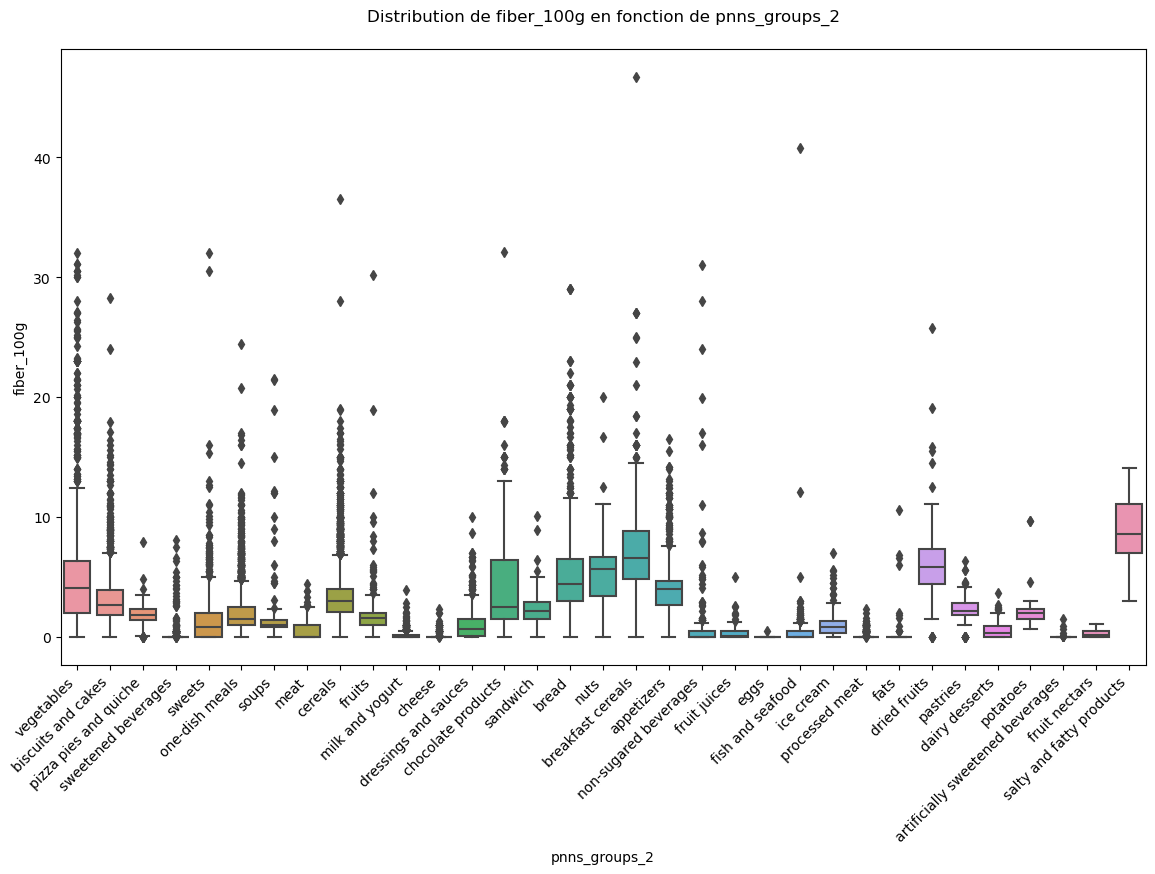

In [134]:
plot_boxplot_with_comment(X_cleaned, y, 'fiber_100g')

##### Observations : fiber_100g / pnns_groups_2
- Les catégories "vegetables", "bread", "cereals", et "nuts" montrent des niveaux élevés de fibres, avec des médianes souvent supérieures à 5g par 100g et des valeurs maximales atteignant jusqu'à 40g.
- Les catégories "vegetables", "bread", et "cereals" présentent une grande variabilité, avec des valeurs aberrantes atteignant des niveaux très élevés de fibres.
- Les catégories "sweetened beverages", "fruit juices", "ice cream", et "meat" montrent des niveaux très faibles de fibres, souvent proches de zéro.

## 6. Réalisation d'une analyse multi-variées <a class="anchor" id="partie6"></a>

Nous allons faire une analyse en composantes principales (ACP)

##### Normalisation des données

In [139]:
# Liste des variables quantitatives sélectionnées
quantitative_features = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 
    'sugars_100g', 'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g'
]

# Vérification des données quantitatives
X_quantitative = X_cleaned[quantitative_features]

# Création de l'objet StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation aux données
X_scaled = scaler.fit_transform(X_quantitative)

# Convertir le résultat en DataFrame pour plus de commodité
X_scaled_df = pd.DataFrame(X_scaled, columns=quantitative_features)

# Afficher un aperçu des données normalisées
print(X_scaled_df.head())

   energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
0     0.069873  0.011259            0.368893           -0.414361    -0.721086   
1    -0.088829 -0.070740           -0.332117            0.147850     0.789785   
2    -0.898208 -0.317368           -0.211543           -0.956519    -0.677411   
3     0.167739 -0.304122           -0.107794            0.702899     1.970344   
4    -1.296285 -0.745655           -0.612521           -0.865563    -0.084930   

   salt_100g  sodium_100g  proteins_100g  fiber_100g  
0   0.683250     0.477381       2.351672   -0.184121  
1  -0.094245    -0.070367      -0.623638   -0.184121  
2  -0.170299    -0.124681      -0.300131   -0.700588  
3  -0.324001    -0.232666      -0.532801    0.664606  
4  -0.413671    -0.295910      -1.154318   -0.812808  


##### Calculer la Matrice de Covariance

In [141]:
# Calculer la matrice de covariance
cov_matrix = np.cov(X_scaled_df, rowvar=False)

# Afficher la matrice de covariance
print("Matrice de Covariance :")
print(cov_matrix)

Matrice de Covariance :
[[ 1.00004322  0.74168674  0.54722529  0.58947753  0.30969093  0.03900161
   0.02676665  0.24341035  0.30393959]
 [ 0.74168674  1.00004322  0.72362867 -0.05761331  0.02156408  0.06320534
   0.04834082  0.08573065 -0.0198623 ]
 [ 0.54722529  0.72362867  1.00004322 -0.03401123  0.13110905  0.03807162
   0.03110851  0.09803716 -0.07764414]
 [ 0.58947753 -0.05761331 -0.03401123  1.00004322  0.51657498 -0.04430411
  -0.0281651   0.05092366  0.41971107]
 [ 0.30969093  0.02156408  0.13110905  0.51657498  1.00004322 -0.08606367
  -0.0523509  -0.23023478  0.01207587]
 [ 0.03900161  0.06320534  0.03807162 -0.04430411 -0.08606367  1.00004322
   0.91675732  0.15383655 -0.00786854]
 [ 0.02676665  0.04834082  0.03110851 -0.0281651  -0.0523509   0.91675732
   1.00004322  0.10872369 -0.00707363]
 [ 0.24341035  0.08573065  0.09803716  0.05092366 -0.23023478  0.15383655
   0.10872369  1.00004322  0.2616249 ]
 [ 0.30393959 -0.0198623  -0.07764414  0.41971107  0.01207587 -0.0078685

##### Calcul des Valeurs Propres et des Vecteurs Propres

In [143]:
# Calculer les valeurs propres et les vecteurs propres de la matrice de covariance
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Afficher les valeurs propres et les vecteurs propres
print("Valeurs Propres :")
print(eigenvalues)
print("\nVecteurs Propres :")
print(eigenvectors)

Valeurs Propres :
[2.60344584 2.01219419 1.67144111 1.30072101 0.62948664 0.41601093
 0.27180856 0.01358792 0.08169275]

Vecteurs Propres :
[[ 0.59492447  0.06844803 -0.02572331  0.04171557 -0.02555078  0.36258371
  -0.12123487 -0.7014332  -0.01231482]
 [ 0.47390891 -0.10203874  0.41805492  0.0187796  -0.21207404  0.16837025
  -0.45997316  0.55155008  0.02773274]
 [ 0.43285461 -0.07820219  0.41919581 -0.060263    0.03882551 -0.46026652
   0.64311792 -0.00976128 -0.01076645]
 [ 0.32033496  0.26716581 -0.5178935  -0.11579588  0.0795563   0.3993057
   0.43139843  0.43864748  0.0097526 ]
 [ 0.23102513  0.27426358 -0.23213021 -0.55854913  0.34628846 -0.48294286
  -0.38995822  0.00345964 -0.0177886 ]
 [ 0.08014626 -0.63336067 -0.23524534 -0.17949592 -0.03044161  0.00453032
  -0.0009338   0.02019335 -0.70958849]
 [ 0.0755322  -0.62133247 -0.24778088 -0.21997611 -0.0593823  -0.02259206
   0.01330796 -0.02471455  0.70258909]
 [ 0.16417278 -0.18479706 -0.12070706  0.63301873  0.69826124 -0.10911

##### Sélection des Composantes Principales

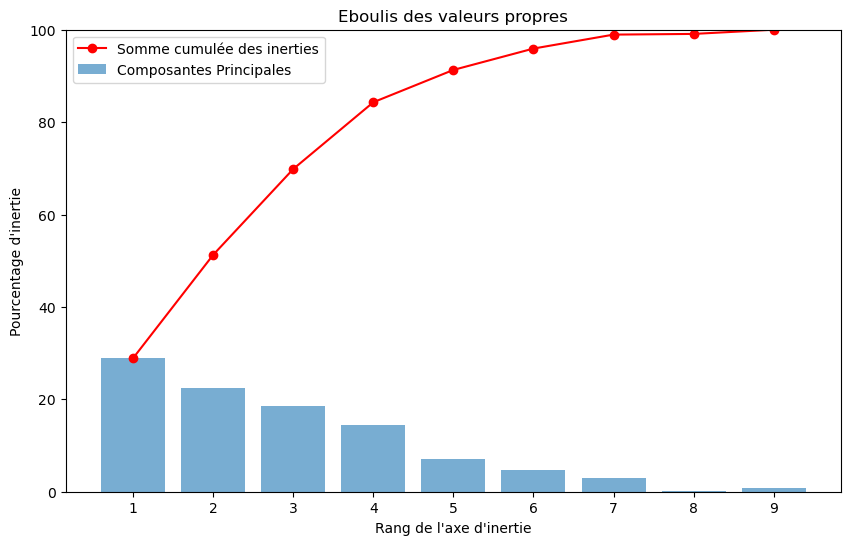

In [145]:
# Calculer le pourcentage de variance expliquée par chaque composante principale
explained_variance = [val / sum(eigenvalues) * 100 for val in eigenvalues]
cumulative_variance = np.cumsum(explained_variance)

# Liste des indices des composantes principales
components = list(range(1, len(explained_variance) + 1))

# Créer le scree plot
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance, alpha=0.6, label='Composantes Principales')
plt.plot(components, cumulative_variance, marker='o', color='r', label='Somme cumulée des inerties')

plt.xlabel('Rang de l\'axe d\'inertie')
plt.ylabel('Pourcentage d\'inertie')
plt.title('Eboulis des valeurs propres')
plt.xticks(components)
plt.ylim(0, 100)  # Limiter l'axe y à 0-100 pour montrer le pourcentage de variance expliquée
plt.legend()
plt.show()

##### Observations
Basé sur ce graphique, il serait raisonnable de retenir les 3 premières composantes principales pour la suite de l'analyse. Elles expliquent une grande partie de la variance des données et permettent de simplifier le modèle tout en conservant une quantité significative d'information. Cependant, si l'objectif est de capturer plus de 90% de la variance, alors il faudrait considérer jusqu'à 5 composantes principales.

Choisissons de retenir les 3 premières composantes principales, car elles capturent une part significative de la variance tout en simplifiant le modèle. (Je ferais des tests sur un autre notebook, en ajoutant plus de composantes par la suite, par curiosité)

In [148]:
# Nombre de composantes principales à retenir
n_components = 3

# Initialisation de l'ACP
pca = PCA(n_components=n_components)

# Ajuster et transformer les données
X_pca = pca.fit_transform(X_scaled_df)

# Convertir le résultat en DataFrame pour plus de commodité
pca_columns = [f'PC{i+1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Afficher un aperçu des données projetées
print(X_pca_df.head())

        PC1       PC2       PC3
0  0.347775  1.516793 -0.058046
1 -0.151942 -0.482710  0.230132
2 -1.450015  0.286040 -0.871276
3  0.589679 -1.296554  1.093674
4 -2.092207 -0.355268 -0.602138


In [149]:
# Calcul des charges factorielles
loadings = eigenvectors * np.sqrt(eigenvalues)

# Création d'un DataFrame pour les charges factorielles
df_charge_factorielle = pd.DataFrame(loadings, index=quantitative_features, columns=[f'PC{i+1}' for i in range(len(eigenvalues))])

# Afficher les charges factorielles
print("Charges factorielles :")
print(df_charge_factorielle)

Charges factorielles :
                         PC1       PC2       PC3       PC4       PC5  \
energy_100g         0.959922  0.097095 -0.033256  0.047576 -0.020272   
fat_100g            0.764661 -0.144744  0.540479  0.021418 -0.168260   
saturated-fat_100g  0.698419 -0.110931  0.541954 -0.068729  0.030804   
carbohydrates_100g  0.516867  0.378980 -0.669555 -0.132064  0.063120   
sugars_100g         0.372764  0.389048 -0.300108 -0.637021  0.274746   
salt_100g           0.129318 -0.898434 -0.304135 -0.204714 -0.024152   
sodium_100g         0.121873 -0.881371 -0.320342 -0.250881 -0.047114   
proteins_100g       0.264896 -0.262138 -0.156055  0.721953  0.554002   
fiber_100g          0.318823  0.147687 -0.571546  0.493938 -0.458939   

                         PC6       PC7       PC8       PC9  
energy_100g         0.233863 -0.063206 -0.081764 -0.003520  
fat_100g            0.108597 -0.239808  0.064293  0.007927  
saturated-fat_100g -0.296867  0.335291 -0.001138 -0.003077  
carbohydrate

##### Observations
- PC1 (Composante Principale 1)
    - energy_100g (0.96) : Très forte charge positive, indiquant que cette variable influence fortement PC1.
    - fat_100g (0.76) : Forte charge positive.
    - saturated-fat_100g (0.70) : Forte charge positive.
    - carbohydrates_100g (0.52) : Charge positive significative.
    - Interprétation : PC1 semble être une composante liée à la teneur en énergie, en graisses et en glucides des produits alimentaires.
######
- PC2 (Composante Principale 2)
    - salt_100g (-0.90) : Très forte charge négative.
    - sodium_100g (-0.88) : Très forte charge négative.
    - Interprétation : PC2 est principalement influencée par la teneur en sel et en sodium, représentant une dimension de salinité des produits.
######
- PC3 (Composante Principale 3)
    - fat_100g (0.54) : Forte charge positive.
    - saturated-fat_100g (0.54) : Forte charge positive.
    - carbohydrates_100g (-0.67) : Charge négative significative.
    - Interprétation : PC3 pourrait représenter une composante liée aux graisses, en opposition aux glucides.
######
- PC4 (Composante Principale 4)
    - proteins_100g (0.72) : Forte charge positive.
    - fiber_100g (0.49) : Charge positive significative.
    - sugars_100g (-0.64) : Charge négative significative.
    - Interprétation : PC4 est liée à la teneur en protéines et en fibres, en opposition à la teneur en sucres.
######
- PC5 (Composante Principale 5)
    - proteins_100g (0.55) : Forte charge positive.
    - sugars_100g (0.27) : Charge positive.
    - fiber_100g (-0.46) : Charge négative significative.
    - Interprétation : PC5 semble également être influencée par les protéines, les fibres et les sucres, mais de manière différente par rapport à PC4.

##### Utilisation des cercles de corrélations

##### Création d'une fonction pour afficher les cercles de corrélations (jusqu'à 6 CP)

In [153]:
def plot_correlation_circle(pca, components=(1, 2), feature_names=None):
    
    plt.figure(figsize=(8, 8))
    if feature_names is None:
        feature_names = [f'Variable {i}' for i in range(pca.components_.shape[1])]

    # Sélectionner les composantes principales
    pc_x = components[0] - 1
    pc_y = components[1] - 1

    # Tracer le cercle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    plt.gca().add_artist(circle)

    # Tracer les flèches pour chaque variable
    for i in range(pca.components_.shape[1]):
        plt.arrow(0, 0, pca.components_[pc_x, i], pca.components_[pc_y, i], 
                  head_width=0.05, head_length=0.05, fc='red', ec='red')
        plt.text(pca.components_[pc_x, i], pca.components_[pc_y, i], feature_names[i],
                 color='green', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC{components[0]}')
    plt.ylabel(f'PC{components[1]}')
    plt.title(f'Cercle des corrélations (PC{components[0]} et PC{components[1]})')
    plt.grid()
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.show()

# Exemples d'utilisation de la fonction
# Créer une instance PCA et ajuster sur les données normalisées
pca = PCA(n_components=6)
pca.fit(X_scaled)


PCA(n_components=6)

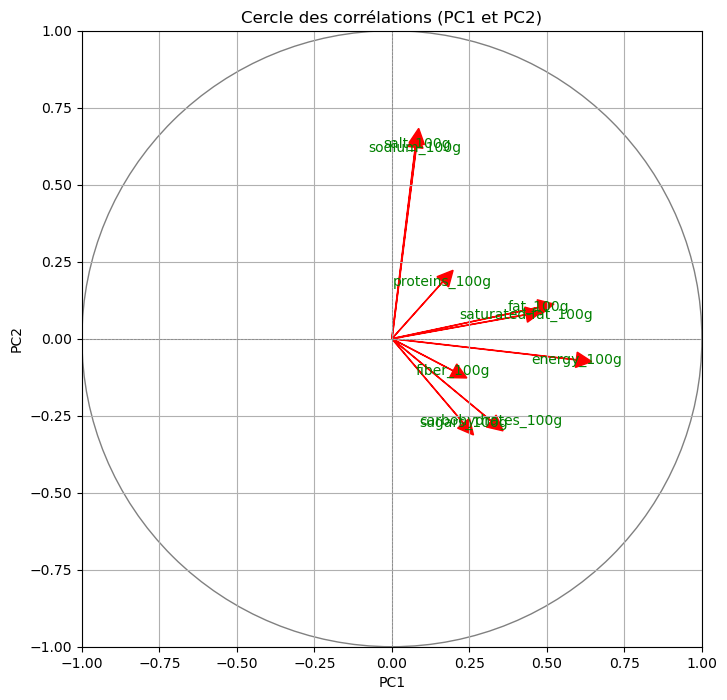

In [154]:
# Tracer le cercle des corrélations pour les composantes principales 1 et 2
plot_correlation_circle(pca, components=(1, 2), feature_names=quantitative_features)

##### Observations
Ce cercle de corrélations montre que les premières composantes principales (PC1 et PC2) capturent bien la variance des variables énergétiques et grasses. En effet, les variables energy_100g, fat_100g, et saturated-fat_100g sont fortement corrélées avec PC1.Les glucides et les sucres montrent également une corrélation positive avec PC1.
Le sel et le sodium eux sont fortement corrélés à PC2.
On peut donc dire que PC1 représente les aliments énergétiques et gras tandis que PC2 représente les aliments salés.

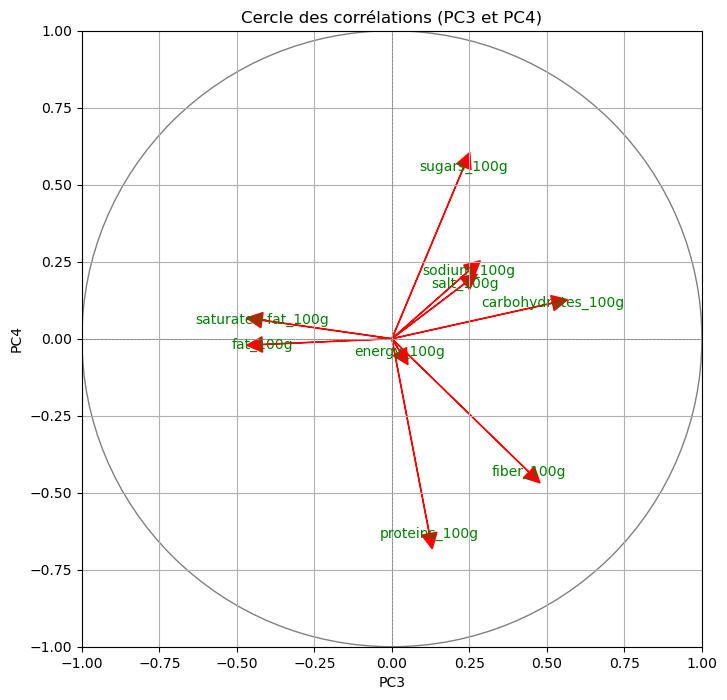

In [156]:
# Tracer le cercle des corrélations pour les composantes principales 3 et 4
plot_correlation_circle(pca, components=(3, 4), feature_names=quantitative_features)

##### Observations
Ici nous observons que la variable carbohydrates est modérément corrélée à PC3, suivie par la variable fibre.
Les variables fat et saturated-fat sont anticorrélées à PC3, ce qui montrent que les aliments sont rarement gras et glucidiques à la fois.
Les sucres sont eux corrélés à PC4.
On peut dire que PC3 représente les aliments glucidiques et PC4 les aliments sucrés, mais dans une moindre mesure.

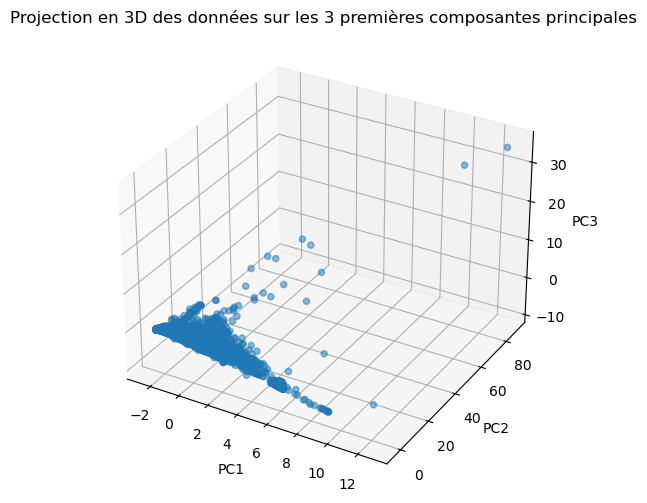

In [158]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_df['PC1'], X_pca_df['PC2'], X_pca_df['PC3'], alpha=0.5)
ax.set_title('Projection en 3D des données sur les 3 premières composantes principales')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

##### Observations
Le graphique 3D présente les données projetées sur les trois premières composantes principales (PC1, PC2 et PC3), ce qui permet d'explorer plus en profondeur les relations entre les observations.

- Distribution Générale
    - Concentration Centrale : La majorité des points sont concentrés près de l'origine (0,0,0) sur les axes PC1, PC2 et PC3. Cela indique que la majorité des observations n'ont pas de valeurs extrêmes dans ces trois premières composantes principales.

    - Points Éloignés : Certains points sont situés loin de cette zone centrale, notamment ceux très éloignés sur les axes PC2 et PC3. Ces points peuvent représenter des observations avec des valeurs atypiques ou aberrantes.

- Clusters et Segments
    - Concentration Dense Près de l'Origine : La forte concentration de points près de l'origine pourrait représenter un segment de données où les variables quantitatives sont proches des moyennes standardisées.
    - Clusters Distincts : Les points éloignés peuvent représenter différents clusters ou groupes distincts de données, basés sur les composantes principales. Cela pourrait indiquer une structure sous-jacente intéressante dans les données.

#### Analyse ANOVA

In [161]:
# S'assurer que 'pnns_groups_2' est dans le DataFrame
if 'pnns_groups_2' not in X_cleaned.columns:
    X_cleaned['pnns_groups_2'] = y  # S'assurer que y est la variable cible correcte


# S'assurer que 'pnns_groups_2' est convertie en catégorie
X_cleaned['pnns_groups_2'] = X_cleaned['pnns_groups_2'].astype('category')

# Renommer les colonnes pour éviter les tirets
X_cleaned_renamed = X_cleaned.rename(columns={
    'saturated-fat_100g': 'saturated_fat_100g',
    'carbohydrates_100g': 'carbohydrates_100g',
    'sugars_100g': 'sugars_100g',
    'salt_100g': 'salt_100g',
    'sodium_100g': 'sodium_100g',
    'proteins_100g': 'proteins_100g',
    'fiber_100g': 'fiber_100g'
})

# Fonction pour effectuer l'ANOVA et créer une table pour chaque variable quantitative
def anova_table(data, target, predictors):
    anova_results = {}
    
    for predictor in predictors:
        formula = f'{predictor} ~ C({target})'
        model = ols(formula, data=data).fit()
        anova_result = sm.stats.anova_lm(model, typ=2)
        anova_results[predictor] = anova_result

    return anova_results

# Liste des variables quantitatives renommées
quantitative_features_renamed = [
    'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g'
]

# Créer les tables ANOVA pour chaque variable quantitative
anova_results = anova_table(X_cleaned_renamed, 'pnns_groups_2', quantitative_features_renamed)

# Vérifier et afficher les résultats de l'ANOVA pour chaque variable
for feature, result in anova_results.items():
    print(f"ANOVA pour {feature}:")
    print(result)
    print("\n")

# Sélectionner uniquement les colonnes numériques
numeric_columns = X_cleaned_renamed.select_dtypes(include=['number']).columns

# Afficher les moyennes pour chaque groupe
group_means = X_cleaned_renamed.groupby('pnns_groups_2', observed=False)[numeric_columns].mean()
print("Moyennes par groupe pour chaque variable:")
print(group_means)

ANOVA pour energy_100g:
                        sum_sq       df            F  PR(>F)
C(pnns_groups_2)  9.367762e+09     32.0  1751.386338     0.0
Residual          3.862313e+09  23107.0          NaN     NaN


ANOVA pour fat_100g:
                        sum_sq       df            F  PR(>F)
C(pnns_groups_2)  3.938071e+06     32.0  1514.156899     0.0
Residual          1.878046e+06  23107.0          NaN     NaN


ANOVA pour saturated_fat_100g:
                         sum_sq       df           F  PR(>F)
C(pnns_groups_2)  597741.196832     32.0  744.861183     0.0
Residual          579470.634778  23107.0         NaN     NaN


ANOVA pour carbohydrates_100g:
                        sum_sq       df            F  PR(>F)
C(pnns_groups_2)  1.371182e+07     32.0  2284.837978     0.0
Residual          4.333446e+06  23107.0          NaN     NaN


ANOVA pour sugars_100g:
                        sum_sq       df            F  PR(>F)
C(pnns_groups_2)  3.927998e+06     32.0  1256.997306     0.0
Residua

##### Résultat de l'ANOVA
Toutes les p-valeurs sont extrêmement faibles (proches de 0), ce qui suggère que les différences entre les groupes pour toutes les variables sont statistiquement significatives.

##### Moyenne par groupe
Les moyennes pour chaque variable par groupe montrent comment chaque groupe diffère en termes de nutriments. Par exemple :

- energy_100g: Les groupes avec la plus haute énergie moyenne sont les "fats" et les "nuts".
- fat_100g: Les groupes "fats" et "nuts" ont les plus hauts niveaux de graisses moyennes.
- saturated_fat_100g: Encore une fois, les groupes "fats" et "nuts" montrent des niveaux élevés de graisses saturées.
- carbohydrates_100g: Les groupes "breakfast cereals" et "sweets" ont des niveaux élevés de glucides.
- sugars_100g: Les groupes "dried fruits" et "sweets" montrent des niveaux élevés de sucres.
- salt_100g: Les groupes "dressings and sauces" et "processed meat" ont des niveaux élevés de sel.
- sodium_100g: Les groupes "processed meat" et "dressings and sauces" montrent des niveaux élevés de sodium.
- proteins_100g: Les groupes "processed meat" et "cheese" ont des niveaux élevés de protéines.
- fiber_100g: Les groupes "vegetables" et "nuts" montrent des niveaux élevés de fibres.
- Ces résultats montrent clairement que les groupes alimentaires diffèrent significativement en termes de leurs profils nutritionnels, ce qui est cohérent avec les résultats de l'ANOVA.

Les résultats confirment que les catégories pnns_groups_2 influencent de manière significative les valeurs des variables quantitatives. Cela renforce la pertinence de l'analyse ACP précédente, en montrant que les groupes pnns_groups_2 ont des profils nutritionnels distincts. Cette information est précieuse pour comprendre la composition nutritionnelle des différentes catégories alimentaires et pourrait être utilisée pour des analyses supplémentaires ou pour informer les recommandations nutritionnelles.

##### Initialisation du modèle et résultats

In [164]:
# Nombre de composantes principales à utiliser (par exemple, les 3 premières)
n_components = 3

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :n_components], y, test_size=0.2, random_state=42)

# Initialiser le modèle
model = RandomForestClassifier(random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Afficher le rapport de classification
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.73
Classification Report:
                                  precision    recall  f1-score   support

                      appetizers       0.76      0.85      0.81       251
artificially sweetened beverages       0.35      0.30      0.32        20
              biscuits and cakes       0.77      0.83      0.80       528
                           bread       0.81      0.77      0.79       260
               breakfast cereals       0.76      0.81      0.78       243
                         cereals       0.82      0.77      0.79       486
                          cheese       0.83      0.80      0.82       149
              chocolate products       0.62      0.64      0.63        91
                  dairy desserts       0.62      0.55      0.58        69
            dressings and sauces       0.64      0.57      0.60       165
                    dried fruits       0.78      0.66      0.71        32
                            eggs       0.94      1.00      0.97        15

C:\Users\devil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Observations
- Bonne Performance :
Les classes avec des aliments bien définis et distincts comme "cheese", "fats", et "biscuits and cakes" montrent des scores élevés.
- Classes Sous-Représentées :
Les catégories avec peu d'échantillons comme "artificially sweetened beverages" et "fruit nectars" ont des performances faibles.
- Classes Confuses :
Les classes avec des caractéristiques similaires peuvent être confondues, ce qui est visible dans les valeurs non-diagonales de la matrice de confusion.

Le modèle montre une performance globale satisfaisante avec une accuracy de 0.73. Les classes bien définies et représentées sont bien prédictées, tandis que les classes avec peu d'échantillons ou des caractéristiques ambiguës ont des performances plus faibles. Pour améliorer le modèle, il pourrait être bénéfique de travailler sur l'augmentation des données pour les catégories sous-représentées.

##### Initialisation du modèle avec toutes les variables prédictives

Le modèle précédent n'était basé que sur les variables prédictives quantitatives, l'ACP ne fonctionnant pas avec les variables qualitatives.
Pour intégrer des variables qualitatives dans notre modèle de machine learning, nous devons les convertir en un format numérique que le modèle peut comprendre.
Nous utiliserons ici l'encodage one-hot, qui va créé une colonne binaire pour chaque catégorie des variables qualitative.
Après l'encodage des variables qualitatives et l'ACP sur les variables quantitatives, les données seront combinées pour former le jeu de données final.

In [167]:
# Sélectionner les variables quantitatives et qualitatives
quantitative_features = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 
    'sugars_100g', 'salt_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g'
]

qualitative_features = ['categories', 'pnns_groups_1']

# Créer un préprocesseur pour normaliser les variables quantitatives et encoder les variables qualitatives
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative_features),
        ('cat', OneHotEncoder(), qualitative_features)
    ])

# Appliquer le préprocesseur aux données
X_processed = preprocessor.fit_transform(X_cleaned)

# Convertir la matrice sparse en matrice dense
X_processed_dense = X_processed.toarray()

# Appliquer PCA sur les variables quantitatives uniquement
pca = PCA(n_components=3)
X_quantitative_pca = pca.fit_transform(X_processed_dense[:, :len(quantitative_features)])

# Combiner les composantes principales avec les variables qualitatives encodées
X_final = np.hstack((X_quantitative_pca, X_processed_dense[:, len(quantitative_features):]))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédire sur les ensembles de test et de train
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculer les scores de précision
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Afficher les rapports de classification et les matrices de confusion
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))

print("Classification Report (Train):")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_pred_train))

# Afficher les scores de précision
print(f'Accuracy (Test): {accuracy_test:.2f}')
print(f'Accuracy (Train): {accuracy_train:.2f}')

Classification Report (Test):
                                  precision    recall  f1-score   support

                      appetizers       0.97      1.00      0.98       251
artificially sweetened beverages       0.88      0.35      0.50        20
              biscuits and cakes       0.90      0.98      0.94       528
                           bread       0.96      0.90      0.93       260
               breakfast cereals       0.94      0.97      0.95       243
                         cereals       0.91      0.95      0.93       486
                          cheese       0.97      0.94      0.96       149
              chocolate products       0.84      0.76      0.80        91
                  dairy desserts       0.87      0.70      0.77        69
            dressings and sauces       0.98      0.99      0.98       165
                    dried fruits       0.79      0.97      0.87        32
                            eggs       1.00      1.00      1.00        15
       

##### Observations
- Amélioration Significative :
L'intégration des variables qualitatives a significativement amélioré la précision globale du modèle.
- Meilleure Distinction des Classes :
Les classes bien définies et représentées montrent des scores encore plus élevés.
- Classes Sous-Représentées :
Certaines catégories avec peu d'échantillons montrent encore des performances plus faibles, bien que légèrement améliorées.

L'inclusion des variables qualitatives a amélioré la performance du modèle de manière significative, passant l'accuracy de 0.73 à 0.91. Les classes bien définies et mieux représentées montrent des scores élevés, et la majorité des classes montrent une réduction des erreurs de classification. Cela indique que l'ajout de ces variables apporte une valeur significative au modèle. Pour une amélioration continue, il pourrait être utile de travailler davantage sur les classes sous-représentées.

###### Précision
J'ai poussé le modèle jusqu'à 6 composantes et l'efficacité n'est monté que de 1% à partir de la 4 ème composante.
Une ACP à 3 composantes est donc suffisante.

##### Représentation graphique des résultats du modèle

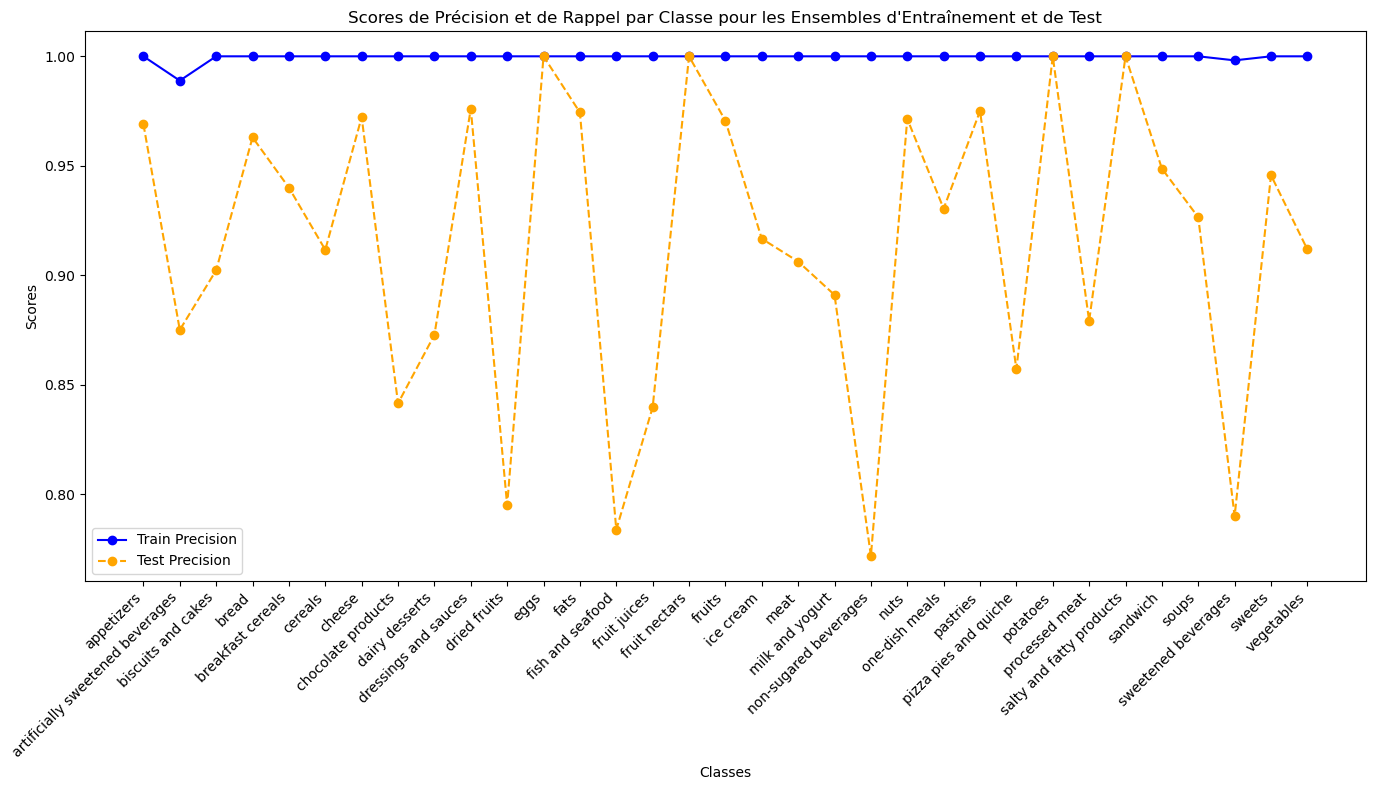

In [171]:
# Calculer les rapports de classification pour l'ensemble d'entraînement et de test
train_report = classification_report(y_train, y_pred_train, output_dict=True)
test_report = classification_report(y_test, y_pred_test, output_dict=True)

# Récupérer les étiquettes des classes
labels = list(train_report.keys())[:-3]  # Exclure 'accuracy', 'macro avg' et 'weighted avg'

# Récupérer les scores de précision pour chaque classe
train_precision = [train_report[label]['precision'] for label in labels]
test_precision = [test_report[label]['precision'] for label in labels]

# Indices pour les classes
x = np.arange(len(labels))

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(14, 8))

# Tracer les lignes de précision
ax.plot(x, train_precision, label='Train Precision', marker='o', linestyle='-', color='blue')
ax.plot(x, test_precision, label='Test Precision', marker='o', linestyle='--', color='orange')

# Ajouter des annotations
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Scores de Précision et de Rappel par Classe pour les Ensembles d\'Entraînement et de Test')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Ajuster l'agencement pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()

##### Observations
- La précision sur l'ensemble de test varie considérablement entre les classes. Certaines classes, comme biscuits and cakes, cereals, et one-dish meals, montrent des scores de précision élevés proches de 1.0, ce qui indique une bonne performance du modèle pour ces classes spécifiques.
- Cependant, certaines classes comme artificially sweetened beverages, meat, non-sugared beverages, salty and fatty products, et sweetened beverages montrent des scores de précision plus bas, indiquant que le modèle a des difficultés à bien prédire ces catégories.

## 7. Conclusion <a class="anchor" id="partie7"></a>

Notre modèle performe plus à l'entrainement (1.00) qu'au test (0.92), nous sommes dans un cas d'Overfitting.
Pour corriger ce problème, nous pouvons:
- Collecter Plus de Données : Si possible, collecter davantage de données pour les classes sous-représentées pour équilibrer les classes.
- Utiliser une technique d'Augmentation des Données : Utiliser des techniques comme le sur-échantillonnage (oversampling) des classes minoritaires avec des méthodes telles que SMOTE (Synthetic Minority Over-sampling Technique) ou l'ajout manuel de nouvelles données pour ces classes.

Pour répondre à la problématique qui a été posée en début de projet, la création d'un système d'auto-complétion est donc tout à fait possible. Plus nous aurons de représentation au sein des différentes catégories et plus ce système sera efficace.

#### RGPD

Pendant les opérations de nettoyage des données, il est essentiel de veiller au respect des normes RGPD. Voici une explication des 5 grands principes du RGPD et pourquoi notre travail n'a pas de lien avec les RGPD.

- 1. Licéité, Loyauté et Transparence :
    - Explication : Les données doivent être traitées de manière légale, loyale et transparente vis-à-vis de la personne concernée.
    - Notre Travail : Les données Open Food Facts sont des informations nutritionnelles publiques sur les produits alimentaires, ne contenant pas de données personnelles.

- 2. Limitation des Finalités :
    - Explication : Les données doivent être collectées pour des finalités spécifiques, explicites et légitimes et ne doivent pas être traitées ultérieurement de manière incompatible avec ces finalités.
    - Notre Travail : Le projet vise uniquement à améliorer la qualité de la base de données pour fournir des informations nutritionnelles précises et fiables.

- 3. Minimisation des Données :
    - Explication : Les données collectées doivent être adéquates, pertinentes et limitées à ce qui est nécessaire au regard des finalités pour lesquelles elles sont traitées.
    - Notre Travail : Nous travaillons uniquement avec des données nutritionnelles et des informations produits nécessaires pour améliorer la base de données.

- 4. Exactitude :
    - Explication : Les données doivent être exactes et, si nécessaire, tenues à jour. Les données inexactes doivent être effacées ou rectifiées sans délai.
    - Notre Travail : L'objectif principal du projet est de nettoyer les données pour garantir leur exactitude et leur fiabilité.

- 5. Limitation de la Conservation :
    - Explication : Les données personnelles doivent être conservées sous une forme permettant l'identification des personnes concernées pendant une durée n'excédant pas celle nécessaire au regard des finalités pour lesquelles elles sont traitées.
    - Notre Travail : Les données traitées ne contiennent pas d'informations personnelles et sont destinées à être utilisées pour des finalités continues de fourniture d'informations nutritionnelles.
######
- Le projet ne traite que des données nutritionnelles publiques, sans lien avec les données personnelles des individus. Les 5 grands principes RGPD sont donc bien respectés.

